<html>
<body>

<h1 style="color:darkblue; font-family:verdana; font-size:300%; text-align:center;"> Saudi Arabia Hotels</h1>
<img src="welcome.jpeg"align="center" width="600" height="100" >
</body>
</html>


<html>
<body>

<h1 style="color:darkblue; font-family:verdana;" > Dataset Description:</h1>
<p>This dataset is created from booking.com from April 29 to May 1, the duration for 2 nights and for 1 adult</p>
<hr>

<h2 style="color:darkblue; font-family:verdana; ">Columns</h2>
<ol>
  <li>hotel_name: name of the hotel</li>
  <li>city: city where the hotel is located </li>
  <li>review_badge: rate of review from 1 to 10 </li>
  <li>review_title: hotel review if it is ('Good', 'VeryGood', 'Wonderful', 'Excellent', 'Exceptional')</li>
    <li>review_number: number of reviews </li>
  <li>price: price of the hotel without the taxes </li>
  <li>stars: hotel stars number </li>
  <li>taxes_and_charges: taxes and chargers price </li>
  <li>hotel_type: the hotel type if its ('Condo Hotel', 'Chalets', 'Apartments', 'Villa) </li>
  <li> Total_price: the total price of the hotel (price taxes and charges * 2 )
   
    
</ol> 


</body>
</html>

<h1 style="color:darkblue; font-family:verdana;" > Requirements:</h1>

In [2]:
%%capture
!pip install jupyter-dash
!pip install xgboost

In [3]:
#import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as p 
pd.options.mode.chained_assignment = None  # default='warn'

import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.io as pio
#----------------------------------------------------------------
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
#----------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from xgboost import XGBRegressor
import xgboost as xg


<h1 style="color:darkblue; font-family:verdana;" > Reading The Dataset:</h1>

In [4]:
df=pd.read_csv("KSAhotels (1).csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hotel_name         1025 non-null   object 
 1   city               1025 non-null   object 
 2   review_badge       1025 non-null   object 
 3   review_title       918 non-null    object 
 4   review_number      918 non-null    float64
 5   price              1025 non-null   int64  
 6   stars              143 non-null    float64
 7   taxes_and_charges  820 non-null    float64
 8   hotel_type         696 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 72.2+ KB


In [6]:
df.describe()

,review_number,price,stars,taxes_and_charges
count,918.000000,1025.000000,143.000000,820.000000
mean,313.842048,261.864390,2.958042,17.492683
std,433.338537,76.605512,0.739948,7.750927
min,3.000000,36.000000,1.000000,0.000000
25%,63.000000,204.000000,3.000000,13.000000
50%,167.000000,266.000000,3.000000,17.000000
75%,395.000000,320.000000,3.000000,23.000000
max,4599.000000,382.000000,5.000000,46.000000


In [7]:
df.shape

(1025, 9)

<b><p style="color:darkblue; font-family:verdana;" > * Convert column "review_badge" from object to numeric</p>

In [8]:
# convert the review badge to numeric
df['review_badge']=pd.to_numeric(df['review_badge'],errors='coerce')
df['review_badge'].dtype

dtype('float64')

<h1 style="color:darkblue; font-family:verdana;" >Missing Values</h1>
<p  style="color:darkblue; font-family:verdana;" >How Many Missing Values in Each Column</p>

In [9]:
# Checking the null values for all the coulmns 

#1. Hotel_Name column
Hotel_name=df['hotel_name'].isnull().sum()
print("Missing values in Hotel_name column is : ", Hotel_name)


#2.city column
city=df['city'].isnull().sum()
print("Missing values in city column is : ", city)


#3. review_badge column 
Review_badge=df['review_badge'].isnull().sum()
print("Missing values in review_badge column is : ", Review_badge)

#4. review_title column 
Review_title=df['review_title'].isnull().sum()
print("Missing values in review_title column is : ", Review_title)

#5. review_number column 
Review_number=df['review_number'].isnull().sum()
print("Missing values in review_number column is : ", Review_number)

#6. review_number column 
Price=df['price'].isnull().sum()
print("Missing values in price column is : ", Price)


#7. star column 
Star=df['stars'].isnull().sum()
print("Missing values in star column is : ", Star)


#8. taxes_and_charges column 
Taxes=df['taxes_and_charges'].isnull().sum()
print("Missing values in taxes_and_charges column is : ", Taxes)


#9. hotel type 
Hotel_type=df['hotel_type'].isnull().sum()
print("Missing values in hotel_type column is : ", Hotel_type)

Missing values in Hotel_name column is :  0
Missing values in city column is :  0
Missing values in review_badge column is :  247
Missing values in review_title column is :  107
Missing values in review_number column is :  107
Missing values in price column is :  0
Missing values in star column is :  882
Missing values in taxes_and_charges column is :  205
Missing values in hotel_type column is :  329


 <b><p style="color:darkblue; font-family:verdana;" >* Dropping column 'stars', since it has 882 missing values</p>

In [10]:
# drop stars column 
df = df.drop("stars", axis=1)

<h1 style="color:darkblue; font-family:verdana;" >Preprocessing</h1>

<b><p  style="color:darkblue; font-family:verdana;" >Hotel Type Column</p></b>
<p style="color:darkblue; font-family:verdana;" > * Column "hotel_type" have 2 values with the same meaning (Apartments and Apartment), so Apartment is replaced with Apartments</p>

In [11]:
# before replacement
print("Before")

print (df['hotel_type'].value_counts())
print("\n")
#Repalcing Apartment with Apartments
df["hotel_type"].replace({"Apartment": "Apartments"}, inplace=True)

# After replacement
print("After")
print (df['hotel_type'].value_counts())

Before
Condo Hotel    653
Apartments      35
Apartment        4
Chalets          3
Villa            1
Name: hotel_type, dtype: int64


After
Condo Hotel    653
Apartments      39
Chalets          3
Villa            1
Name: hotel_type, dtype: int64


<b><p  style="color:darkblue; font-family:verdana;"> City Column</p></b>
<p style="color:darkblue; font-family:verdana;"> As it shown, there are cities with less frequency, those will be dropped</p>

In [12]:
print (df['city'].value_counts())

#Droping values with less than 8 frequencey
value_counts=df['city'].value_counts()
remove=value_counts[value_counts <=8].index
df = df[~df.city.isin(remove)]
df['city'].value_counts() 



Riyadh            192
Jeddah            184
AlKhobar           82
Dammam             57
Yanbu              53
Abha               50
Mecca              48
Buraydah           40
Taif               34
Tabuk              32
Medina             30
Hail               27
AlJubail           25
Jazan              22
KhamisMushayt      21
AlKharj            13
HafrAl-Batin        8
Muhayil             7
Arar                7
AlHofuf             7
Unayzah             7
Najran              6
Sharurah            6
AlAhsa              5
AlBaha              5
Sakakah             4
Khafji              4
Rabigh              4
AlMajma'ah          4
AlQunfudhah         4
AlNairyah           4
AlMajaridah         3
UmmLajj             2
AlHada              2
Rafha               2
Tanomah             2
AhadRafidah         2
AlThybiyah          2
Rayyis              2
Hafa                2
Qal'atBishah        1
Quai                1
Tathleeth           1
Ghamrah             1
Baljurashi          1
AlBukayriy

Riyadh           192
Jeddah           184
AlKhobar          82
Dammam            57
Yanbu             53
Abha              50
Mecca             48
Buraydah          40
Taif              34
Tabuk             32
Medina            30
Hail              27
AlJubail          25
Jazan             22
KhamisMushayt     21
AlKharj           13
Name: city, dtype: int64

<b><p  style="color:darkblue; font-family:verdana;">Add total price column</p></b>
<p style="color:darkblue; font-family:verdana;"> To calculate the total price of a hotel, we multipled the price * taxes_and_chargers columnn</p>

In [13]:
#Add total column
df['Total_price']=(df['price']+df['taxes_and_charges'])*2
#df['Total_price'].astype(int)
df

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
0,NASEEM,Riyadh,3.9,Reviewscore,7.0,36,NaN,NaN,NaN
1,BATHA,Riyadh,4.2,Reviewscore,13.0,36,NaN,NaN,NaN
2,Nzha,AlKhobar,5.4,Reviewscore,72.0,38,2.0,Condo Hotel,80.0
3,Flower,Dammam,NaN,Reviewscore,49.0,38,NaN,Condo Hotel,NaN
4,Yamamah,Riyadh,NaN,Reviewscore,5.0,38,4.0,Condo Hotel,84.0
...,...,...,...,...,...,...,...,...,...
1020,Rose Al Hamra,Jeddah,NaN,NaN,NaN,380,NaN,Condo Hotel,NaN
1021,Blue Sands Plaza,AlKhobar,NaN,NaN,NaN,380,29.0,Condo Hotel,818.0
1022,Abha Park Furnished Units,Abha,NaN,NaN,NaN,380,29.0,Condo Hotel,818.0
1023,Khalifa Tower,AlJubail,6.3,NaN,NaN,378,19.0,Condo Hotel,794.0


<h3 style="color:darkblue; font-family:verdana;">Since we dropped values from the city columns, and before contiuning with the remaining preprocessing for all the columns. An important step must be taken. Which is: </h3>
<p style="color:darkblue; font-family:verdana;"> First, we will do data segmentation to the city column, where we will do sub-category for each city. Then for each city columns missing values it will be fillied according to the city. </p>

<p style="color:darkblue; font-family:verdana;"> The reason for doing this step is, it wont be apporpiate to handle the missing values by just taking the whole dataset and perform missing values methods. </p>

<p style="color:darkblue; font-family:verdana;"> For example; if we didn't do the data segmentation, and start the handle the missing values the results wont be accurate, beacuse what in Riyadh is not what in Jeddah.


<p style="color:darkblue; font-family:verdana;"> If we do the data segmentation, the for each city the missing values will be replaced with the appropiate values.

<p style="color:darkblue; font-family:verdana;"> After this step we will concatenate the sub-dataset for all cities</p>

<h1 style="color:darkblue; font-family:verdana;">Data Segmentation</h1>

<b><p style="color:darkblue; font-family:verdana;"> 1. Riyadh</p>

In [14]:
df_riyadh=df[df['city'].isin(['Riyadh'])]
df_riyadh.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
0,NASEEM,Riyadh,3.9,Reviewscore,7.0,36,NaN,NaN,NaN
1,BATHA,Riyadh,4.2,Reviewscore,13.0,36,NaN,NaN,NaN
4,Yamamah,Riyadh,NaN,Reviewscore,5.0,38,4.0,Condo Hotel,84.0
9,REEMAL,Riyadh,5.6,Reviewscore,51.0,40,NaN,Chalets,NaN
11,Al Marqab (Males Only),Riyadh,3.4,Reviewscore,88.0,50,0.0,Condo Hotel,100.0


In [15]:
#Value Count
print (df_riyadh.value_counts())

print ("\n")

#info
print (df_riyadh.info())

print ("\n")

# check the missing values
print (df_riyadh.isnull().sum())

hotel_name                            city    review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Amoria Furnished Apartments 4      Riyadh  7.5           Good          104.0          298    15.0               Condo Hotel  626.0          1
Marasicom Suites Alwaha               Riyadh  7.7           Wonderful     62.0           300    15.0               Condo Hotel  630.0          1
Qimat Alrehab                         Riyadh  6.6           Reviewscore   279.0          300    15.0               Condo Hotel  630.0          1
Qasr Al Azizia                        Riyadh  7.5           VeryGood      38.0           214    16.0               Condo Hotel  460.0          1
Paradise Al Narjis Hotel Suites       Riyadh  9.3           VeryGood      567.0          306    23.0               Condo Hotel  658.0          1
                                                                                                                                       

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Riyadh city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
    <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [16]:
# review badge 
review_badge_riyadh=round(df_riyadh["review_badge"].mean())
df_riyadh["review_badge"] = df_riyadh["review_badge"].fillna(review_badge_riyadh)


#replace the reviewscore with the mode
df_riyadh['review_title']=df_riyadh['review_title'].replace(['Reviewscore'],np.NaN)
# Review title
review_title_riyadh=df_riyadh["review_title"].mode()[0]
df_riyadh['review_title']=df_riyadh['review_title'].replace(np.NaN,review_title_riyadh)



# hotel type title
hotel_type_riyadh=df_riyadh["hotel_type"].mode()[0]
df_riyadh['hotel_type']=df_riyadh['hotel_type'].replace(np.NaN,hotel_type_riyadh)


##using median
# taxes and charges
tax_and_charges_median_riyadh=round(df_riyadh['taxes_and_charges'].median())
df_riyadh['taxes_and_charges']=df_riyadh['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_riyadh)


#review_number

review_number_median_riyadh=round(df_riyadh['review_number'].median())
df_riyadh['review_number']=df_riyadh['review_number'].replace(np.NaN,review_number_median_riyadh)


#Total_price

Total_price_median_riyadh=round(df_riyadh['Total_price'].median())
df_riyadh['Total_price']=df_riyadh['Total_price'].replace(np.NaN,Total_price_median_riyadh)


<b><p style="color:darkblue; font-family:verdana;"> 2. Jeddah <p>

In [17]:
df_jeddah=df[df['city'].isin(['Jeddah'])]
df_jeddah.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
35,Jazli Hotel Suites,Jeddah,7.0,Reviewscore,214.0,106,8.0,Condo Hotel,228.0
38,Helm Jeddah Hotel Apartments,Jeddah,5.6,Reviewscore,35.0,110,8.0,Condo Hotel,236.0
44,Al Eairy Furnished Apartments- Jeddah 1,Jeddah,6.3,Good,454.0,120,9.0,Condo Hotel,258.0
47,OYO 342 Dar Taibah Furnished Units,Jeddah,6.3,Reviewscore,974.0,120,9.0,Condo Hotel,258.0
48,OYO 341 Sorooh Taibah Furnished Apartments,Jeddah,8.4,Reviewscore,274.0,120,9.0,Condo Hotel,258.0


In [18]:
#value count
print (df_jeddah.value_counts())

print ("\n")

# info
print(df_jeddah.info())

print("\n")

#check the missing values
print(df_jeddah.isnull().sum())

hotel_name                               city    review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Eairy Furnished Apartments- Jeddah 1  Jeddah  6.3           Good          454.0          120    9.0                Condo Hotel  258.0          2
AH                                       Jeddah  8.2           Good          322.0          290    22.0               Condo Hotel  624.0          1
Qasr Al Mosaidya - Al hamra Family Only  Jeddah  5.7           Good          182.0          180    14.0               Condo Hotel  388.0          1
Oasis Rise Hotel Apartments              Jeddah  6.7           Reviewscore   105.0          198    15.0               Condo Hotel  426.0          1
OYO 395 Al  Hotel                        Jeddah  4.3           Reviewscore   252.0          200    5.0                Condo Hotel  410.0          1
                                                                                                                     

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Jeddah city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
    <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [19]:
# review the badge 
review_badge_jeddah=round(df_jeddah["review_badge"].mean())
df_jeddah["review_badge"] = df_jeddah["review_badge"].fillna(review_badge_jeddah)


#replace the reviewscore with the mode
df_jeddah['review_title']=df_jeddah['review_title'].replace(['Reviewscore'],np.NaN)
# Review title
review_title_jeddah=df_jeddah["review_title"].mode()[0]
df_jeddah['review_title']=df_jeddah['review_title'].replace(np.NaN,review_title_jeddah)



# hotel type
hotel_type_jeddah=df_jeddah["hotel_type"].mode()[0]
df_jeddah['hotel_type']=df_jeddah['hotel_type'].replace(np.NaN,hotel_type_jeddah)

##using median
# taxes and charges
tax_and_charges_median_jeddah=round(df_jeddah['taxes_and_charges'].median())
df_jeddah['taxes_and_charges']=df_jeddah['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_jeddah)


#review_number

review_number_median_jeddah=round(df_jeddah['review_number'].median())
df_jeddah['review_number']=df_jeddah['review_number'].replace(np.NaN,review_number_median_jeddah)


#Total_price

Total_price_median_jeddah=round(df_jeddah['Total_price'].median())
df_jeddah['Total_price']=df_jeddah['Total_price'].replace(np.NaN,Total_price_median_jeddah)


<b><p style="color:darkblue; font-family:verdana;"> 3. AlKhobar</p></b>


In [20]:
df_alkhobar=df[df['city'].isin(['AlKhobar'])]
df_alkhobar.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
2,Nzha,AlKhobar,5.4,Reviewscore,72.0,38,2.0,Condo Hotel,80.0
15,Althuqbah,AlKhobar,NaN,Reviewscore,388.0,74,4.0,Condo Hotel,156.0
20,Masaya 2 Furnished Units,AlKhobar,5.0,Reviewscore,21.0,82,16.0,Condo Hotel,196.0
33,Masaya Furnished Apartments,AlKhobar,NaN,Reviewscore,497.0,101,18.0,Condo Hotel,238.0
42,Danat Apartments,AlKhobar,5.8,Good,940.0,120,6.0,Condo Hotel,252.0


In [21]:
#value count
print (df_alkhobar.value_counts())

print("\n")

# info
print(df_alkhobar.info())

print("\n")
#check the missing values
print(df_alkhobar.isnull().sum())

hotel_name                                              city      review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Danat Apartments                                        AlKhobar  5.8           Good          940.0          120    6.0                Condo Hotel  252.0          4
Al Baron Palace Khobar                                  AlKhobar  6.8           Good          5.0            300    23.0               Condo Hotel  646.0          1
Makarem Al Olaya Suites                                 AlKhobar  5.6           Reviewscore   166.0          138    7.0                Condo Hotel  290.0          1
Villa Hotel Apartments Al Khobar                        AlKhobar  8.2           VeryGood      230.0          250    19.0               Condo Hotel  538.0          1
Sara Alkhobar Furnished Apartments                      AlKhobar  7.8           Reviewscore   35.0           360    27.0               Condo Hotel  774.0          1
Olaya Houses 1 

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to AlKhobar city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
    <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [22]:
# review the badge 
review_badge_alkhobar=round(df_alkhobar["review_badge"].mean())
df_alkhobar["review_badge"] = df_alkhobar["review_badge"].fillna(review_badge_alkhobar)



#replace the reviewscore with the mode
df_alkhobar['review_title']=df_alkhobar['review_title'].replace(['Reviewscore'],np.NaN)
# Review title
review_title_alkhobar=df_alkhobar["review_title"].mode()[0]
df_alkhobar['review_title']=df_alkhobar['review_title'].replace(np.NaN,review_title_alkhobar)




# hotel type
hotel_type_alkhobar=df_alkhobar["hotel_type"].mode()[0]
df_alkhobar['hotel_type']=df_alkhobar['hotel_type'].replace(np.NaN,hotel_type_alkhobar)


##using median
# taxes and charges
tax_and_charges_median_alkhobar=round(df_alkhobar['taxes_and_charges'].median())
df_alkhobar['taxes_and_charges']=df_alkhobar['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_alkhobar)


#review_number

review_number_median_alkhobar=round(df_alkhobar['review_number'].median())
df_alkhobar['review_number']=df_alkhobar['review_number'].replace(np.NaN,review_number_median_alkhobar)


#Total_price

Total_price_median_alkhobar=round(df_alkhobar['Total_price'].median())
df_alkhobar['Total_price']=df_alkhobar['Total_price'].replace(np.NaN,Total_price_median_alkhobar)



<b><p style="color:darkblue; font-family:verdana;"> 4. Dammam</p></b>



In [23]:
df_dammam=df[df['city'].isin(['Dammam'])]
df_dammam.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
3,Flower,Dammam,NaN,Reviewscore,49.0,38,NaN,Condo Hotel,NaN
5,Khaleej,Dammam,NaN,Reviewscore,7.0,38,2.0,Condo Hotel,80.0
8,Sunset fog,Dammam,5.4,Reviewscore,6.0,40,NaN,NaN,NaN
10,Adamah,Dammam,5.8,Reviewscore,14.0,48,2.0,Condo Hotel,100.0
14,Rose,Dammam,5.6,Good,229.0,74,NaN,Condo Hotel,NaN


In [24]:
#value count
print(df_dammam.value_counts())


print("\n")
#info
print(df_dammam.info())

print("\n")
#check the missing values
print(df_dammam.isnull().sum())

hotel_name                           city    review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Adamah                               Dammam  5.8           Reviewscore   14.0           48     2.0                Condo Hotel  100.0          1
Inwan Residential Units              Dammam  6.6           Good          403.0          200    10.0               Condo Hotel  420.0          1
Ruoof Furnished Units Apartment      Dammam  7.0           Good          25.0           258    19.0               Condo Hotel  554.0          1
Refan Suites                         Dammam  8.0           Good          10.0           240    18.0               Condo Hotel  516.0          1
                                             7.9           Good          180.0          240    17.0               Condo Hotel  514.0          1
Natwan Furnished unites              Dammam  7.9           Good          941.0          270    21.0               Condo Hotel  582.0         

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Dammam city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [25]:
# review the badge 
review_badge_dammam=round(df_dammam["review_badge"].mean())
df_dammam["review_badge"] = df_dammam["review_badge"].fillna(review_badge_dammam)


#replace the reviewscore with NaN
df_dammam['review_title']=df_dammam['review_title'].replace(['Reviewscore'],np.NaN)
# Review title
review_title_dammam=df_dammam["review_title"].mode()[0]
df_dammam['review_title']=df_dammam['review_title'].replace(np.NaN,review_title_dammam)




# hotel type
hotel_type_dammam=df_dammam["hotel_type"].mode()[0]
df_dammam['hotel_type']=df_dammam['hotel_type'].replace(np.NaN,hotel_type_dammam)



##using median
# taxes and charges
tax_and_charges_median_dammam=round(df_dammam['taxes_and_charges'].median())
df_dammam['taxes_and_charges']=df_dammam['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_dammam)


#review_number

review_number_median_dammam=round(df_dammam['review_number'].median())
df_dammam['review_number']=df_dammam['review_number'].replace(np.NaN,review_number_median_dammam)


#Total_price

Total_price_median_dammam=round(df_dammam['Total_price'].median())
df_dammam['Total_price']=df_dammam['Total_price'].replace(np.NaN,Total_price_median_dammam)


<b><p style="color:darkblue; font-family:verdana;"> 5. Yanbu</p></b>

In [26]:
df_Yanbu=df[df['city'].isin(['Yanbu'])]
df_Yanbu.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
76,Hana Yanbu Hotel Apartments,Yanbu,6.5,Reviewscore,189.0,150,NaN,Condo Hotel,NaN
80,Mouj Elbahr Aparthotel,Yanbu,5.9,Reviewscore,528.0,158,NaN,Condo Hotel,NaN
86,Fakher Yanbu II,Yanbu,5.2,Good,81.0,160,NaN,Condo Hotel,NaN
124,Qimat Rahati,Yanbu,7.8,Reviewscore,565.0,180,NaN,NaN,NaN
125,Qimat Rahati,Yanbu,NaN,Reviewscore,158.0,180,NaN,NaN,NaN


In [27]:
#value count
print(df_Yanbu.value_counts())

print("\n")

#info
print(df_Yanbu.info())

print("\n")
#check the missing values
print(df_Yanbu.isnull().sum())

hotel_name                             city   review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Masa Furnished Units Yanbu 2        Yanbu  7.9           Reviewscore   127.0          260    13.0               Condo Hotel  546.0          1
Al Yamamah Palace Suites Yanbu         Yanbu  7.1           Good          363.0          320    24.0               Condo Hotel  688.0          1
Avene For Furnished Residential Units  Yanbu  7.3           VeryGood      311.0          225    11.0               Condo Hotel  472.0          1
Benzart Hotel Apartments               Yanbu  7.8           Reviewscore   16.0           300    15.0               Condo Hotel  630.0          1
                                              8.7           Reviewscore   380.0          300    23.0               Condo Hotel  646.0          1
Fantazia Beach                         Yanbu  6.6           Good          793.0          340    26.0               Condo Hotel  732.0  

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Yanbu city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [28]:
# review the badge 
review_badge_yanbu=round(df_Yanbu["review_badge"].mean())
df_Yanbu["review_badge"] = df_Yanbu["review_badge"].fillna(review_badge_yanbu)


#replace the reviewscore with NaN
df_Yanbu['review_title']=df_Yanbu['review_title'].replace(['Reviewscore'],np.NaN)
# Review title
review_title_yanbu=df_Yanbu["review_title"].mode()[0]
df_Yanbu['review_title']=df_Yanbu['review_title'].replace(np.NaN,review_title_yanbu)


# hotel type title
hotel_type_Yanbu=df_Yanbu["hotel_type"].mode()[0]
hotel_type_Yanbu
df_Yanbu['hotel_type']=df_Yanbu['hotel_type'].replace(np.NaN,hotel_type_Yanbu)


##using median
# taxes and charges
tax_and_charges_median_Yanbu=round(df_Yanbu['taxes_and_charges'].median())
df_Yanbu['taxes_and_charges']=df_Yanbu['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_Yanbu)


#review_number

review_number_median_Yanbu=round(df_Yanbu['review_number'].median())
df_Yanbu['review_number']=df_Yanbu['review_number'].replace(np.NaN,review_number_median_Yanbu)


#Total_price

Total_price_median_Yanbu=round(df_Yanbu['Total_price'].median())
df_Yanbu['Total_price']=df_Yanbu['Total_price'].replace(np.NaN,Total_price_median_Yanbu)

<b><p style="color:darkblue; font-family:verdana;"> 6. Abha</p></b>

In [29]:
df_Abha = df[df["city"]=='Abha']
df_Abha.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
41,OYO 467 Al Dahya Hotel,Abha,6.1,Reviewscore,6.0,119,9.0,NaN,256.0
61,OYO 315 Ramz Abha Hotel,Abha,5.9,Reviewscore,305.0,134,7.0,NaN,282.0
62,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,NaN,290.0
72,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,NaN,306.0
139,Al Arjowan Hotel Units,Abha,8.1,Reviewscore,134.0,186,9.0,Condo Hotel,390.0


In [30]:
#value count
print(df_Abha.value_counts())
print("\n")

#info
print(df_Abha.info())

print("\n")
#check the missing values
print(df_Abha.isnull().sum())

hotel_name                                           city  review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Abha Sky (Families Only)                             Abha  7.0           VeryGood      624.0          298    7.0                Condo Hotel  610.0          1
Al Afaq Alraqi Furnished Apartments (Families only)  Abha  4.9           Good          114.0          200    10.0               Condo Hotel  420.0          1
Al Arjowan Hotel Units                               Abha  8.1           Reviewscore   134.0          186    9.0                Condo Hotel  390.0          1
Al Bouvardia Hotel Units                             Abha  8.0           VeryGood      139.0          340    17.0               Condo Hotel  714.0          1
Al Narjis Suites - Abha                              Abha  5.5           Good          166.0          220    17.0               Condo Hotel  474.0          1
Ayar Aparthotel - for families only                  Abha

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Abha city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [31]:
#review_badge
review_badge_mode_Abha=df_Abha['review_badge'].mean()
df_Abha['review_badge']=df_Abha['review_badge'].replace(np.NaN,review_badge_mode_Abha)


#replace the reviewscore with the NaN
df_Abha['review_title']=df_Abha['review_title'].replace(['Reviewscore'],np.NaN)
#review_title
review_title_mode_Abha=df_Abha['review_title'].mode()[0]
df_Abha['review_title']=df_Abha['review_title'].replace(np.NaN,review_title_mode_Abha)



#hotel_type_
hotel_type_mode_Abha=df_Abha['hotel_type'].mode()[0]
df_Abha['hotel_type']=df_Abha['hotel_type'].replace(np.NaN,hotel_type_mode_Abha)

##using median
# taxes and charges
tax_and_charges_median_Abha=round(df_Abha['taxes_and_charges'].median())
df_Abha['taxes_and_charges']=df_Abha['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_Abha)


#review_number

review_number_median_Abha=round(df_Abha['review_number'].median())
df_Abha['review_number']=df_Abha['review_number'].replace(np.NaN,review_number_median_Abha)


#Total_price

Total_price_median_Abha=round(df_Abha['Total_price'].median())
df_Abha['Total_price']=df_Abha['Total_price'].replace(np.NaN,Total_price_median_Abha)

<b><p style="color:darkblue; font-family:verdana;"> 7. Mecca</p></b>

In [32]:
df_Mecca = df[df["city"]=='Mecca']
df_Mecca.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
12,Hayat Palace,Mecca,5.7,Reviewscore,54.0,56,NaN,NaN,NaN
17,Ruba Al Hijaz Hotel,Mecca,NaN,Reviewscore,546.0,76,6.0,NaN,164.0
18,Masat Al Mohand Al Rouda,Mecca,NaN,Reviewscore,748.0,80,4.0,NaN,168.0
19,Al Eairy Apartments - Makkah 6,Mecca,NaN,Reviewscore,666.0,82,6.0,Condo Hotel,176.0
26,Zahrat Al Yassir Hotel,Mecca,NaN,VeryGood,41.0,100,NaN,NaN,NaN


In [33]:
#value count
print(df_Mecca.value_counts())
print("\n")

#info
print(df_Mecca.info())

print("\n")
##check the missing values
print(df_Mecca.isnull().sum())

hotel_name                       city   review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Eairy Apartments - Makkah 3   Mecca  4.0           Reviewscore   2265.0         102    8.0                Condo Hotel  220.0          1
Al Eairy Apartments - Makkah 5   Mecca  8.4           Reviewscore   1353.0         110    8.0                Condo Hotel  236.0          1
Al Eairy Apartments - Makkah 8   Mecca  6.6           Reviewscore   563.0          108    8.0                Condo Hotel  232.0          1
Al Eairy Apartments- makkah 7    Mecca  4.8           Reviewscore   30.0           288    22.0               Condo Hotel  620.0          1
Park Tulip                       Mecca  7.3           Reviewscore   64.0           238    12.0               Condo Hotel  500.0          1
Salam Albayt Aparthotel          Mecca  7.0           Good          178.0          300    15.0               Condo Hotel  630.0          1
Shouel Inn Furnished Apartments 

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Mecca city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [34]:
#review_badge
review_badge_mean_Mecca=df_Mecca['review_badge'].mean()
df_Mecca['review_badge']=df_Mecca['review_badge'].replace(np.NaN,review_badge_mean_Mecca)


#replace the reviewscore with the NaN
df_Mecca['review_title']=df_Mecca['review_title'].replace(['Reviewscore'],np.NaN)
#review_title
review_title_mode_Mecca=df_Mecca['review_title'].mode()[0]
df_Mecca['review_title']=df_Mecca['review_title'].replace(np.NaN,review_title_mode_Mecca)



#hotel_type
hotel_type_mode_Mecca=df_Mecca['hotel_type'].mode()[0]
df_Mecca['hotel_type']=df_Mecca['hotel_type'].replace(np.NaN,hotel_type_mode_Mecca)



##using median
# taxes and charges
tax_and_charges_median_Mecca=round(df_Mecca['taxes_and_charges'].median())
df_Mecca['taxes_and_charges']=df_Mecca['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_Mecca)


#review_number

review_number_median_Mecca=round(df_Mecca['review_number'].median())
df_Mecca['review_number']=df_Mecca['review_number'].replace(np.NaN,review_number_median_Mecca)


#Total_price

Total_price_median_Mecca=round(df_Mecca['Total_price'].median())
df_Mecca['Total_price']=df_Mecca['Total_price'].replace(np.NaN,Total_price_median_Mecca)

<b><p style="color:darkblue; font-family:verdana;"> 8. Buraydah</p></b>

In [35]:
df_Buraydah = df[df["city"]=='Buraydah']
df_Buraydah.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
45,Al Eairy Apartment-Alqaseem 2,Buraydah,5.3,Reviewscore,949.0,120,9.0,Condo Hotel,258.0
69,Fadet Talla Residentials,Buraydah,5.9,Reviewscore,547.0,140,11.0,Condo Hotel,302.0
75,Al Eairy Apartment-Alqaseem 1,Buraydah,7.6,Reviewscore,39.0,150,11.0,Condo Hotel,322.0
98,Manazel Al Hamra Apartment 2,Buraydah,6.9,Reviewscore,21.0,170,9.0,Condo Hotel,358.0
102,Al Eairy Apartments- Alqaseem 3,Buraydah,NaN,Reviewscore,178.0,170,13.0,Condo Hotel,366.0


In [36]:
#value count
print(df_Buraydah.value_counts())
print("\n")

#info
print(df_Buraydah.info())

print("\n")
##check the missing values
print(df_Buraydah.isnull().sum())

hotel_name                         city      review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Eairy Apartment-Alqaseem 2      Buraydah  5.3           Reviewscore   949.0          120    9.0                Condo Hotel  258.0          2
Al Eairy Apartment-Alqaseem 1      Buraydah  7.6           Reviewscore   39.0           150    11.0               Condo Hotel  322.0          1
Bahget Eljouf Furnished Apartment  Buraydah  6.4           Excellent     3.0            240    12.0               Condo Hotel  504.0          1
Fadet Talla Residentials           Buraydah  5.9           Reviewscore   547.0          140    11.0               Condo Hotel  302.0          1
Manazel Al Hamra Apartment 2       Buraydah  6.9           Reviewscore   21.0           170    9.0                Condo Hotel  358.0          1
Manazel Al Masa Furnished Units    Buraydah  6.6           Reviewscore   9.0            300    15.0               Condo Hotel  630.0         

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Buraydah city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 



In [37]:
#review_badge
review_badge_mean_Buraydah=df_Buraydah['review_badge'].mean()
df_Buraydah['review_badge']=df_Buraydah['review_badge'].replace(np.NaN,review_badge_mean_Buraydah)

#hotel_type
hotel_type_mode_Buraydah=df_Buraydah['hotel_type'].mode()[0]
df_Buraydah['hotel_type']=df_Buraydah['hotel_type'].replace(np.NaN,hotel_type_mode_Buraydah)



#replace the reviewscore with NaN
df_Buraydah['review_title']=df_Buraydah['review_title'].replace(['Reviewscore'],np.NaN)
#review title
review_title_mode_Buraydah=df_Buraydah['review_title'].mode()[0]
df_Buraydah['review_title']=df_Buraydah['review_title'].replace(np.NaN,review_title_mode_Buraydah)



##using median
# taxes and charges
tax_and_charges_median_Buraydah=round(df_Buraydah['taxes_and_charges'].median())
df_Buraydah['taxes_and_charges']=df_Buraydah['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_Buraydah)


#review_number

review_number_median_Buraydah=round(df_Buraydah['review_number'].median())
df_Buraydah['review_number']=df_Buraydah['review_number'].replace(np.NaN,review_number_median_Buraydah)


#Total_price

Total_price_median_Buraydah=round(df_Buraydah['Total_price'].median())
df_Buraydah['Total_price']=df_Buraydah['Total_price'].replace(np.NaN,Total_price_median_Buraydah)

<b><p style="color:darkblue; font-family:verdana;"> 9. Taif</p></b>

In [38]:
df_Taif = df[df["city"]=='Taif']
df_Taif.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
63,Al Eairy Apartments - Al Taif,Taif,5.6,Reviewscore,542.0,136,10.0,Condo Hotel,292.0
66,OYO 176 Hotel Safari Al Hada,Taif,5.5,Good,114.0,139,10.0,NaN,298.0
78,OYO 286 Anhaar Al Taif,Taif,8.0,Good,151.0,153,15.0,Condo Hotel,336.0
90,OYO 472 Sweet Rooms,Taif,NaN,Reviewscore,329.0,166,12.0,NaN,356.0
97,OYO 212 Zahrat Al Jal,Taif,7.8,Good,306.0,170,13.0,Apartments,366.0


In [39]:
#value count
print(df_Taif.value_counts())

print("\n")
# info
print(df_Taif.info())

print("\n")
#check the missing values
print(df_Taif.isnull().sum())

hotel_name                       city  review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Eairy Apartments - Al Taif    Taif  5.6           Reviewscore   542.0          136    10.0               Condo Hotel  292.0          1
Al Taif Suites                   Taif  7.2           Good          85.0           200    15.0               Condo Hotel  430.0          1
Alhan Aparthotel                 Taif  8.4           Good          953.0          240    24.0               Apartments   528.0          1
Almuhaidb Sudair                 Taif  7.9           Good          31.0           330    25.0               Condo Hotel  710.0          1
Bule Palace Tower                Taif  6.7           VeryGood      207.0          210    16.0               Condo Hotel  452.0          1
Janayen Alwed                    Taif  6.8           VeryGood      320.0          360    21.0               Condo Hotel  762.0          1
Layal Wardiyah Furnished Units   Taif  

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Taif city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [40]:
#review badge
review_badge_mean_Taif=df_Taif['review_badge'].mean()
df_Taif['review_badge']=df_Taif['review_badge'].replace(np.NaN,review_badge_mean_Taif)


#replace the reviewscore with NaN
df_Taif['review_title']=df_Taif['review_title'].replace(['Reviewscore'],np.NaN)
#Review title
review_title_mode_Taif=df_Taif['review_title'].mode()[0]
df_Taif['review_title']=df_Taif['review_title'].replace(np.NaN,review_title_mode_Taif)



#hotel type
hotel_type_mode_Taif=df_Taif['hotel_type'].mode()[0]
df_Taif['hotel_type']=df_Taif['hotel_type'].replace(np.NaN,hotel_type_mode_Taif)


##using median
# taxes and charges
tax_and_charges_median_Taif=round(df_Taif['taxes_and_charges'].median())
df_Taif['taxes_and_charges']=df_Taif['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_Taif)


#review_number

review_number_median_Taif=round(df_Taif['review_number'].median())
df_Taif['review_number']=df_Taif['review_number'].replace(np.NaN,review_number_median_Taif)


#Total_price

Total_price_median_Taif=round(df_Taif['Total_price'].median())
df_Taif['Total_price']=df_Taif['Total_price'].replace(np.NaN,Total_price_median_Taif)

<b><p style="color:darkblue; font-family:verdana;"> 10. Tabuk</p></b>

In [41]:
df_Tabuk = df[df["city"]=='Tabuk']
df_Tabuk.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
52,Al Eairy Apartments - Tabuk 1,Tabuk,NaN,Reviewscore,490.0,126,9.0,Condo Hotel,270.0
54,Al Eairy Apartments - Tabuk 3,Tabuk,NaN,Good,200.0,128,10.0,Condo Hotel,276.0
58,Al Eairy Apartments - Tabuk 6,Tabuk,7.2,Reviewscore,86.0,130,10.0,Condo Hotel,280.0
60,Al Eairy Apartments- Tabuk 2,Tabuk,7.6,Reviewscore,1443.0,132,10.0,Condo Hotel,284.0
71,Al Eairy Apartments- Tabuk 4,Tabuk,5.7,Reviewscore,258.0,140,11.0,Condo Hotel,302.0


In [42]:
#value count
print(df_Tabuk.value_counts())

print("\n")
#info
print(df_Tabuk.info())
print("\n")
#check the missing values
print(df_Tabuk.isnull().sum())

hotel_name                               city   review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Eairy Apartments - Tabuk 6            Tabuk  7.2           Reviewscore   86.0           130    10.0               Condo Hotel  280.0          1
Al Eairy Apartments- Tabuk 2             Tabuk  7.6           Reviewscore   1443.0         132    10.0               Condo Hotel  284.0          1
Al Eairy Apartments- Tabuk 4             Tabuk  5.7           Reviewscore   258.0          140    11.0               Condo Hotel  302.0          1
Burj Al Faris Hotel Apartments           Tabuk  7.1           Reviewscore   5.0            238    0.0                Condo Hotel  476.0          1
Hamasat Al Rabwah Furnished Units        Tabuk  3.9           Good          2005.0         300    15.0               Condo Hotel  630.0          1
                                                7.5           Reviewscore   18.0           300    0.0                Condo 

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Tabuk city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 


In [43]:
#review badge
review_badge_mode_Tabuk=df_Tabuk['review_badge'].mean()
df_Tabuk['review_badge']=df_Tabuk['review_badge'].replace(np.NaN,review_badge_mode_Tabuk)



#replace the reviewscore with NaN
df_Tabuk['review_title']=df_Tabuk['review_title'].replace(['Reviewscore'],np.NaN)
#review title
review_title_mode_Tabuk=df_Tabuk['review_title'].mode()[0]
df_Tabuk['review_title']=df_Tabuk['review_title'].replace(np.NaN,review_title_mode_Tabuk)


#hotel type
hotel_type_mode_Tabuk=df_Tabuk['hotel_type'].mode()[0]
df_Tabuk['hotel_type']=df_Tabuk['hotel_type'].replace(np.NaN,hotel_type_mode_Tabuk)


##using median
# taxes and charges
tax_and_charges_median_Tabuk=round(df_Tabuk['taxes_and_charges'].median())
df_Tabuk['taxes_and_charges']=df_Tabuk['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_Tabuk)


#review_number

review_number_median_Tabuk=round(df_Tabuk['review_number'].median())
df_Tabuk['review_number']=df_Tabuk['review_number'].replace(np.NaN,review_number_median_Tabuk)


#Total_price

Total_price_median_Tabuk=round(df_Tabuk['Total_price'].median())
df_Tabuk['Total_price']=df_Tabuk['Total_price'].replace(np.NaN,Total_price_median_Tabuk)

<b><p style="color:darkblue; font-family:verdana;"> 11. Medina</p></b>

In [44]:
df_medina=df[df["city"].isin(['Medina'])]
df_medina.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
140,OYO 463 Mawada Alaziziya,Medina,5.9,Good,180.0,187,14.0,NaN,402.0
164,Karma hotel,Medina,6.0,Good,149.0,196,NaN,Condo Hotel,NaN
193,Basma Plaza,Medina,6.1,VeryGood,56.0,198,NaN,Apartments,NaN
239,Shomookh Hotel,Medina,5.9,Reviewscore,152.0,200,10.0,NaN,420.0
279,Al Eairy Apartments - Al Madinah 14,Medina,NaN,VeryGood,6.0,214,16.0,Condo Hotel,460.0


In [45]:
#value count
print(df_medina.value_counts())

print("\n")
#info
print(df_medina.info())
print("\n")
#check the missing values
print(df_medina.isnull().sum())

hotel_name                               city    review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Eairy Apartments - Al Madinah 4       Medina  7.2           Good          279.0          228    17.0               Condo Hotel  490.0          1
Al Eairy Apartments - Al Madinah 6       Medina  9.5           VeryGood      532.0          224    17.0               Condo Hotel  482.0          1
Al Eairy Apartments- Madinah 5           Medina  7.7           Reviewscore   103.0          218    16.0               Condo Hotel  468.0          1
Al Eyeery Furnished Apartment Medinah 2  Medina  7.6           Good          143.0          218    16.0               Condo Hotel  468.0          1
Al Eyeery Furnitured Apartment 1         Medina  7.6           Reviewscore   51.0           216    16.0               Condo Hotel  464.0          1
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 140 to 953
Data columns (total 9 columns

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Medina city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 


In [46]:
# review badge
colrevBadge_mean = round(df_medina['review_badge'].mean())
df_medina['review_badge'] = df_medina['review_badge'].fillna(colrevBadge_mean)


#replace the reviewscore with NaN
df_medina['review_title'] =df_medina['review_title'].replace(['Reviewscore'], np.NaN)
# review title
colrevTitle_mode = df_medina['review_title'].mode()[0]
df_medina['review_title'] =df_medina['review_title'].replace(np.NaN, colrevTitle_mode)



# hotel type
colhotel_type_mode = df_medina['hotel_type'].mode()[0]
df_medina['hotel_type'] =df_medina['hotel_type'].replace(np.NaN, colhotel_type_mode)


##using median
# taxes and charges
tax_and_charges_median_medina=round(df_medina['taxes_and_charges'].median())
df_medina['taxes_and_charges']=df_medina['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_medina)


#review_number

review_number_median_medina=round(df_medina['review_number'].median())
df_medina['review_number']=df_medina['review_number'].replace(np.NaN,review_number_median_medina)


#Total_price

Total_price_median_medina=round(df_medina['Total_price'].median())
df_medina['Total_price']=df_medina['Total_price'].replace(np.NaN,Total_price_median_medina)


<b><p style="color:darkblue; font-family:verdana;"> 12. Hail</p></b>

In [47]:
df_Hail=df[df["city"].isin(['Hail'])]
df_Hail.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
83,Najmat Sabbabah Furnished Units,Hail,7.2,Wonderful,294.0,160,12.0,Condo Hotel,344.0
88,Al Eairy Apartments- Hael 1,Hail,6.9,Reviewscore,471.0,164,12.0,Condo Hotel,352.0
94,Assal Hail Hotel Apartments,Hail,7.5,Reviewscore,529.0,168,13.0,Condo Hotel,362.0
101,Al Eairy Apartment- Hael 4,Hail,NaN,Reviewscore,77.0,170,13.0,Condo Hotel,366.0
122,Al Eairy Apartments - Hail 3,Hail,5.4,Reviewscore,59.0,180,14.0,Condo Hotel,388.0


In [48]:
#value count
print(df_Hail.value_counts())
print("\n")
#info
print(df_Hail.info())
print("\n")
#check the missing values
print(df_Hail.isnull().sum())

hotel_name                         city  review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Eairy Apartments - Hail 3       Hail  5.4           Reviewscore   59.0           180    14.0               Condo Hotel  388.0          1
Al Eairy Apartments- Hael 1        Hail  6.9           Reviewscore   471.0          164    12.0               Condo Hotel  352.0          1
Almasah Altaj Aparthotel 2         Hail  7.4           Good          1122.0         240    18.0               Condo Hotel  516.0          1
Assal Hail Hotel Apartments        Hail  7.5           Reviewscore   529.0          168    13.0               Condo Hotel  362.0          1
Dist Inn Aparthotel                Hail  7.5           Reviewscore   152.0          360    27.0               Condo Hotel  774.0          1
Khayal Apart-Hotel                 Hail  7.7           Good          11.0           260    13.0               Condo Hotel  546.0          1
Manazel Hail Furnished Ap

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Hail city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 


In [49]:
#review badge
review_badge_mode_Hail=df_Hail['review_badge'].mean()
df_Hail['review_badge']=df_Hail['review_badge'].replace(np.NaN,review_badge_mode_Hail)


#replace reviewscore with NaN
df_Hail['review_title']=df_Hail['review_title'].replace(['Reviewscore'],np.NaN)
#review title
review_title_mode_Hail=df_Hail['review_title'].mode()[0]
df_Hail['review_title']=df_Hail['review_title'].replace(np.NaN,review_title_mode_Hail)


#hotel type
hotel_type_mode_Hail=df_Hail['hotel_type'].mode()[0]
df_Hail['hotel_type']=df_Hail['hotel_type'].replace(np.NaN,hotel_type_mode_Hail)

##using median
# taxes and charges
tax_and_charges_median_Hail=round(df_Hail['taxes_and_charges'].median())
df_Hail['taxes_and_charges']=df_Hail['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_Hail)


#review_number

review_number_median_Hail=round(df_Hail['review_number'].median())
df_Hail['review_number']=df_Hail['review_number'].replace(np.NaN,review_number_median_Hail)


#Total_price

Total_price_median_Hail=round(df_Hail['Total_price'].median())
df_Hail['Total_price']=df_Hail['Total_price'].replace(np.NaN,Total_price_median_Hail)


<b><p style="color:darkblue; font-family:verdana;"> 13. AlJubail</p></b>

In [50]:
df_AlJubail=df[df["city"].isin(['AlJubail'])]
df_AlJubail.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
183,Dorrat Al Jubail 3,AlJubail,5.5,Good,728.0,198,10.0,Condo Hotel,416.0
212,Riva Suites 2,AlJubail,8.0,Good,1150.0,200,NaN,Condo Hotel,NaN
282,Bule Palace Tower,AlJubail,7.9,Good,136.0,216,5.0,NaN,442.0
290,tuline blue,AlJubail,NaN,Good,503.0,218,NaN,NaN,NaN
320,Al Farhan Hotel Suites (Al Jubail),AlJubail,NaN,Good,4.0,225,17.0,NaN,484.0


In [51]:
#value count
print(df_AlJubail.value_counts())
print("\n")
#info
print(df_AlJubail.info())
print("\n")
#check the missing values
print(df_AlJubail.isnull().sum())

hotel_name                      city      review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Amasi for Hotel Suite1          AlJubail  6.6           Reviewscore   105.0          250    13.0               Condo Hotel  526.0          1
Baisan Suites Al Jubail         AlJubail  7.6           Good          551.0          340    17.0               Condo Hotel  714.0          1
Diamond Tower                   AlJubail  6.8           Excellent     211.0          300    23.0               Condo Hotel  646.0          1
Dorrat Al Jubail 3              AlJubail  5.5           Good          728.0          198    10.0               Condo Hotel  416.0          1
OYO 327 Jubail High Rise Hotel  AlJubail  4.8           Good          999.0          233    12.0               Condo Hotel  490.0          1
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 183 to 1023
Data columns (total 9 columns):
 #   Column             Non-Null Count

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to AlJubail city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [52]:
# review badge
colrevBadge_mean = round(df_AlJubail['review_badge'].mean())
df_AlJubail['review_badge'] = df_AlJubail['review_badge'].fillna(colrevBadge_mean)


#replace reviewscore with NaN
df_AlJubail['review_title'] =df_AlJubail['review_title'].replace(['Reviewscore'], np.NaN)
# review title
colrevTitl_mode = df_AlJubail['review_title'].mode()[0]
df_AlJubail['review_title'] =df_AlJubail['review_title'].replace(np.NaN, colrevTitl_mode)



# hotel type
colhotel_type_mode = df_AlJubail['hotel_type'].mode()[0]
df_AlJubail['hotel_type'] =df_AlJubail['hotel_type'].replace(np.NaN, colhotel_type_mode)


##using median
# taxes and charges
tax_and_charges_median_AlJubail=round(df_AlJubail['taxes_and_charges'].median())
df_AlJubail['taxes_and_charges']=df_AlJubail['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_AlJubail)


#review_number

review_number_median_AlJubail=round(df_AlJubail['review_number'].median())
df_AlJubail['review_number']=df_AlJubail['review_number'].replace(np.NaN,review_number_median_AlJubail)


#Total_price

Total_price_median_AlJubail=round(df_AlJubail['Total_price'].median())
df_AlJubail['Total_price']=df_AlJubail['Total_price'].replace(np.NaN,Total_price_median_AlJubail)


<b><p style="color:darkblue; font-family:verdana;"> 14. Jazan</p></b>

In [53]:
df_Jazan=df[df["city"].isin(['Jazan'])]
df_Jazan.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
138,Al Eairy Apartments- jazan 1,Jazan,7.8,Reviewscore,72.0,186,14.0,Condo Hotel,400.0
151,Al Eairy Apartments -JAZAN 2,Jazan,NaN,Reviewscore,286.0,190,14.0,Condo Hotel,408.0
153,Fully furnished flat for rent,Jazan,5.5,Good,1123.0,192,NaN,Apartments,NaN
254,Al Eairy Apartments - Jazan 3,Jazan,8.2,Good,3174.0,204,15.0,Condo Hotel,438.0
298,Zievle Executive Apartments,Jazan,6.6,Good,7.0,219,0.0,Condo Hotel,438.0


In [54]:
#value count
print(df_Jazan.value_counts())
print("\n")
#info
print(df_Jazan.info())
print("\n")
#check the missing values
df_Jazan.isnull().sum()

hotel_name                     city   review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Al Eairy Apartments - Jazan 3  Jazan  8.2           Good          3174.0         204    15.0               Condo Hotel  438.0          1
Al Eairy Apartments- jazan 1   Jazan  7.8           Reviewscore   72.0           186    14.0               Condo Hotel  400.0          1
Al Safa Hotel Suites           Jazan  7.7           VeryGood      164.0          230    17.0               Condo Hotel  494.0          1
Beauty Rayan 2                 Jazan  7.4           Good          273.0          360    27.0               Condo Hotel  774.0          1
Jazan Heart Hotel              Jazan  7.9           VeryGood      177.0          278    21.0               Apartments   598.0          1
Msharef Al Moden Suites Jazan  Jazan  7.2           Good          102.0          300    30.0               Condo Hotel  660.0          1
                                      8.5     

hotel_name           0
city                 0
review_badge         3
review_title         2
review_number        2
price                0
taxes_and_charges    6
hotel_type           7
Total_price          6
dtype: int64

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to Jazan city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 


In [55]:
# Calculate the mean for review badge
colrevBadge_mean = round(df_Jazan['review_badge'].mean())
df_Jazan['review_badge'] = df_Jazan['review_badge'].fillna(colrevBadge_mean)


#replace the reviewscore with NaN
df_Jazan['review_title']=df_Jazan['review_title'].replace(['Reviewscore'],np.NaN)
#review title
review_title_mode_Jazan=df_Jazan['review_title'].mode()[0]
df_Jazan['review_title']=df_Jazan['review_title'].replace(np.NaN,review_title_mode_Jazan)



# Calculate mode for hotel type
colhotel_type_mode = df_Jazan['hotel_type'].mode()[0]
df_Jazan['hotel_type'] =df_Jazan['hotel_type'].replace(np.NaN, colhotel_type_mode)




##using median
# taxes and charges
tax_and_charges_median_Jazan=round(df_Jazan['taxes_and_charges'].median())
df_Jazan['taxes_and_charges']=df_Jazan['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_Jazan)


#review_number

review_number_median_Jazan=round(df_Jazan['review_number'].median())
df_Jazan['review_number']=df_Jazan['review_number'].replace(np.NaN,review_number_median_Jazan)


#Total_price

Total_price_median_Jazan=round(df_Jazan['Total_price'].median())
df_Jazan['Total_price']=df_Jazan['Total_price'].replace(np.NaN,Total_price_median_Jazan)


<b><p style="color:darkblue; font-family:verdana;"> 15. KhamisMushayt</p></b>

In [56]:
df_KhamisMushayt=df[df["city"].isin(['KhamisMushayt'])]
df_KhamisMushayt.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
130,OYO 410 Diamy Apartments,KhamisMushayt,7.7,Reviewscore,59.0,185,14.0,NaN,398.0
167,Mila Hotel 2,KhamisMushayt,6.2,Reviewscore,307.0,196,NaN,Apartments,NaN
170,Meela,KhamisMushayt,NaN,VeryGood,657.0,196,NaN,NaN,NaN
171,AL Faridah Furnished Units,KhamisMushayt,5.0,VeryGood,249.0,196,0.0,Condo Hotel,392.0
220,Riva Suites 2,KhamisMushayt,4.0,Reviewscore,67.0,200,0.0,Condo Hotel,400.0


In [57]:
# value count
print(df_KhamisMushayt.value_counts())
print("\n")
#info
print(df_KhamisMushayt.info())
print("\n")
#check the missing values
print(df_KhamisMushayt.isnull().sum())

hotel_name                        city           review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
 a7la mesaa                       KhamisMushayt  7.2           Good          694.0          310    0.0                Condo Hotel  620.0          1
                                                 7.8           Good          204.0          330    0.0                Apartments   660.0          1
AL Faridah Furnished Units        KhamisMushayt  5.0           VeryGood      249.0          196    0.0                Condo Hotel  392.0          1
Dar Al Bandaqiah Furnished Units  KhamisMushayt  7.8           Reviewscore   164.0          270    21.0               Condo Hotel  582.0          1
Holiday Plus                      KhamisMushayt  7.9           VeryGood      41.0           228    0.0                Condo Hotel  456.0          1
La Casa Hotel Apartment           KhamisMushayt  7.0           Reviewscore   880.0          278    0.0               

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to KhamisMushayt city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 


In [58]:
# review badge
colrevBadge_mean_KhamisMushay = round(df_KhamisMushayt['review_badge'].mean())
df_KhamisMushayt['review_badge'] = df_KhamisMushayt['review_badge'].fillna(colrevBadge_mean_KhamisMushay)



#replace the reviewscore with NaN
df_KhamisMushayt['review_title'] =df_KhamisMushayt['review_title'].replace(['Reviewscore'], np.NaN)
# review title
colrevTitl_mode_KhamisMushay = df_KhamisMushayt['review_title'].mode()[0]
df_KhamisMushayt['review_title'] =df_KhamisMushayt['review_title'].replace(np.NaN, colrevTitl_mode_KhamisMushay)


# Calculate mode for hotel type
colhotel_type_mode_KhamisMushay = df_KhamisMushayt['hotel_type'].mode()[0]
df_KhamisMushayt['hotel_type'] =df_KhamisMushayt['hotel_type'].replace(np.NaN, colhotel_type_mode_KhamisMushay)


##using median
# taxes and charges
tax_and_charges_median_KhamisMushayt=round(df_KhamisMushayt['taxes_and_charges'].median())
df_KhamisMushayt['taxes_and_charges']=df_KhamisMushayt['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_KhamisMushayt)


#review_number

review_number_median_KhamisMushayt=round(df_KhamisMushayt['review_number'].median())
df_KhamisMushayt['review_number']=df_KhamisMushayt['review_number'].replace(np.NaN,review_number_median_KhamisMushayt)


#Total_price

Total_price_median_KhamisMushayt=round(df_KhamisMushayt['Total_price'].median())
df_KhamisMushayt['Total_price']=df_KhamisMushayt['Total_price'].replace(np.NaN,Total_price_median_KhamisMushayt)

<b><p style="color:darkblue; font-family:verdana;"> 16. AlKharj</p></b>

In [59]:
df_AlKharj=df[df["city"].isin(['AlKharj'])]
df_AlKharj.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
211,Nozul Al Leqa Apartments,AlKharj,5.6,Reviewscore,91.0,200,0.0,Condo Hotel,400.0
224,Nozl el Masara Furnished apartments,AlKharj,7.2,Good,315.0,200,NaN,Condo Hotel,NaN
266,Malath Furnished Units,AlKharj,7.2,Reviewscore,607.0,210,11.0,Condo Hotel,442.0
304,Adwaa Rafa,AlKharj,8.2,Reviewscore,76.0,220,NaN,NaN,NaN
305,Al Narjis Suites - Abha,AlKharj,5.4,Good,589.0,220,NaN,Condo Hotel,NaN


In [60]:
#value count
print(df_AlKharj.value_counts())
print("\n")
#info
print(df_AlKharj.info())
print("\n")
#check the missing values
print(df_AlKharj.isnull().sum())

hotel_name                  city     review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Malath Furnished Units      AlKharj  7.2           Reviewscore   607.0          210    11.0               Condo Hotel  442.0          1
Marahal kharj               AlKharj  7.7           Good          143.0          260    20.0               Condo Hotel  560.0          1
                                     8.4           Good          77.0           280    0.0                Condo Hotel  560.0          1
Marahel Kharj Aparthotel 3  AlKharj  7.4           Reviewscore   245.0          278    21.0               Condo Hotel  598.0          1
Nozul Al Leqa Apartments    AlKharj  5.6           Reviewscore   91.0           200    0.0                Condo Hotel  400.0          1
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 211 to 710
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------          

<b><p style="color:darkblue; font-family:verdana;"> *Handle missing values according to AlKarj city</p></b>

<ul>
  <li>review_badge mean method was performed</li>
  <li>review_title,first we replaced the 'Reviewscore' value with Nan, because there no review as Reviewscore, then mode          method was performed </li>
  <li>hotel_type mode method was performed </li>
  <li>taxes_and_charges, review_number, and Total_price median method  was performed  </li>
 
   
    
</ul> 

In [61]:
#review badge
review_badge_mode_AlKharj=df_AlKharj['review_badge'].mean()
df_AlKharj['review_badge']=df_AlKharj['review_badge'].replace(np.NaN,review_badge_mode_AlKharj)
#hotel type
hotel_type_mode_AlKharj=df_AlKharj['hotel_type'].mode()[0]
df_AlKharj['hotel_type']=df_AlKharj['hotel_type'].replace(np.NaN,hotel_type_mode_AlKharj)


##using median
# taxes and charges
tax_and_charges_median_AlKharj=round(df_AlKharj['taxes_and_charges'].median())
df_AlKharj['taxes_and_charges']=df_AlKharj['taxes_and_charges'].replace(np.NaN,tax_and_charges_median_AlKharj)


#review_number

review_number_median_AlKharj=round(df_AlKharj['review_number'].median())
df_AlKharj['review_number']=df_AlKharj['review_number'].replace(np.NaN,review_number_median_AlKharj)


#Total_price

Total_price_median_AlKharj=round(df_AlKharj['Total_price'].median())
df_AlKharj['Total_price']=df_AlKharj['Total_price'].replace(np.NaN,Total_price_median_AlKharj)



#replace the reviewscore with the mode
df_AlKharj['review_title']=df_AlKharj['review_title'].replace(['Reviewscore'],np.NaN)
mode_title_alkharj = df_AlKharj['review_title'].mode()[0]
df_AlKharj['review_title']=df_AlKharj['review_title'].replace(np.NaN,mode_title_alkharj)

<b><p style="color:darkblue; font-family:verdana;"> * After handling the missing values for each sub-category dataframe, now we do the concatenate to combine all the sub-category dataframe togethor</p></b>

<h1 style="color:darkblue; font-family:verdana;"> Concatenate The Dataframes</h1>


In [62]:
hotel_df=pd.concat([df_Abha,df_AlJubail,df_AlKharj,
                    df_alkhobar,df_Buraydah,df_dammam,
                    df_Hail,df_Jazan,df_jeddah,df_KhamisMushayt,
                    df_Mecca,df_medina,df_riyadh,
                    df_Tabuk,df_Taif,df_Yanbu],ignore_index=True)
hotel_df.head(5)

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0


In [63]:
print(hotel_df.value_counts())

print("\n")
print(hotel_df.info())

print("\n")

print(hotel_df.isnull().sum())

hotel_name                        city      review_badge  review_title  review_number  price  taxes_and_charges  hotel_type   Total_price
Danat Apartments                  AlKhobar  5.800000      Good          940.0          120    6.0                Condo Hotel  252.0          4
Blue Sands Plaza                  AlKhobar  7.000000      Good          166.0          380    29.0               Condo Hotel  818.0          3
Abha Park Furnished Units         Abha      7.256098      Good          199.0          380    29.0               Condo Hotel  818.0          3
Khalifa Tower                     AlJubail  6.300000      Good          211.0          378    19.0               Condo Hotel  794.0          2
B2-homes                          Yanbu     7.000000      Good          172.0          380    15.0               Condo Hotel  568.0          2
                                                                                                                                            ..
Dyar

<b><p style="color:darkblue; font-family:verdana;"> *After concatenate The Dataframes, we will do value_count() for each column, to check if there is any noise data</p></b>


<p style="color:darkblue; font-family:verdana;"> *For hotel type column we dropped the values with less frequency</p>


Condo Hotel    874
Apartments      33
Chalets          2
Villa            1
Name: hotel_type, dtype: int64


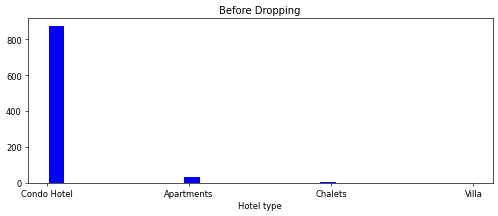

Condo Hotel    874
Apartments      33
Name: hotel_type, dtype: int64


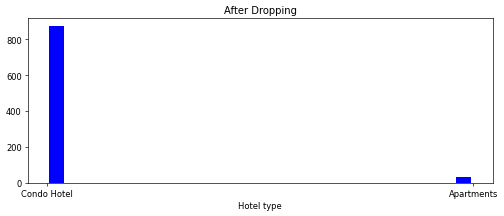

In [64]:
# plot before dropping
print(hotel_df['hotel_type'].value_counts())

plt.figure(figsize=(10,8),dpi=60)
plt.subplot(2, 1, 1)
plt.hist(hotel_df["hotel_type"],bins = 22,rwidth = 0.8,color='blue')
plt.title("Before Dropping");
plt.xlabel("Hotel type");
plt.show()

#Remove the values with less frequency (<=2)
value_counts=hotel_df['hotel_type'].value_counts()
remove_hotel_type=value_counts[value_counts <=2].index
hotel_df = hotel_df[~hotel_df.hotel_type.isin(remove_hotel_type)]
hotel_df['hotel_type'].value_counts()

# plot after dropping 
print(hotel_df['hotel_type'].value_counts())

plt.figure(figsize=(10,8),dpi=60)
plt.subplot(2, 1, 2)
plt.hist(hotel_df["hotel_type"],bins = 22,rwidth = 0.8,color='blue')
plt.title("After Dropping");
plt.xlabel("Hotel type");
plt.show()


<p style="color:darkblue; font-family:verdana;"> *For review title column we dropped the values with less frequency</p>


Good           715
VeryGood       149
Excellent       31
Wonderful        9
Exceptional      3
Name: review_title, dtype: int64


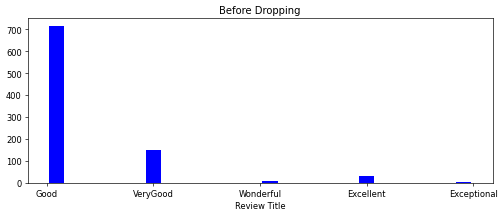

Good         715
VeryGood     149
Excellent     31
Wonderful      9
Name: review_title, dtype: int64


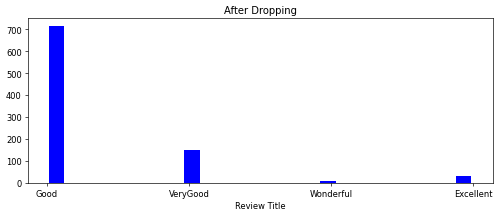

In [65]:
# plot before dropping
print(hotel_df['review_title'].value_counts())

plt.figure(figsize=(10,8),dpi=60)
plt.subplot(2, 1, 1)
plt.hist(hotel_df["review_title"],bins = 22,rwidth = 0.8,color='blue')
plt.title("Before Dropping");
plt.xlabel("Review Title");
plt.show()

#Remove the values with less frequency (<=3)
value_counts=hotel_df['review_title'].value_counts()
remove_review_title=value_counts[value_counts <=3].index
hotel_df = hotel_df[~hotel_df.review_title.isin(remove_review_title)]
hotel_df['review_title'].value_counts()

# plot After dropping
print(hotel_df['review_title'].value_counts())

plt.figure(figsize=(10,8),dpi=60)
plt.subplot(2, 1, 2)
plt.hist(hotel_df["review_title"],bins = 22,rwidth = 0.8,color='blue')
plt.title("After Dropping");
plt.xlabel("Review Title");
plt.show()


<h1 style="color:darkblue; font-family:verdana;"> Binning</h1>
<p style="color:darkblue; font-family:verdana;"> For the rest columns, we will use the binning method in order to handle noisy data</p>

<p style="color:darkblue; font-family:verdana;"> review badge column</p>

In [66]:
print(hotel_df['review_badge'].value_counts())
print("\n")
print(hotel_df['review_badge'].describe())


7.0    185
7.9     40
7.2     37
7.4     31
7.8     29
      ... 
5.1      1
3.4      1
9.2      1
4.7      1
4.3      1
Name: review_badge, Length: 63, dtype: int64


count    904.000000
mean       7.102784
std        0.889666
min        3.400000
25%        6.800000
50%        7.000000
75%        7.700000
max       10.000000
Name: review_badge, dtype: float64


In [67]:
pd.qcut(hotel_df['review_badge'], q=3)

0      (3.399, 7.0]
1      (3.399, 7.0]
2        (7.0, 7.4]
3      (3.399, 7.0]
4       (7.4, 10.0]
           ...     
905    (3.399, 7.0]
906    (3.399, 7.0]
907     (7.4, 10.0]
908    (3.399, 7.0]
909    (3.399, 7.0]
Name: review_badge, Length: 904, dtype: category
Categories (3, interval[float64]): [(3.399, 7.0] < (7.0, 7.4] < (7.4, 10.0]]

In [68]:
hotel_df['review_badge_bin'] = pd.qcut(hotel_df['review_badge'], q=3, precision=0)

hotel_df.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,"(3.3, 7.0]"
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,"(3.3, 7.0]"
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,"(7.0, 7.4]"
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,"(3.3, 7.0]"
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,"(7.4, 10.0]"


In [69]:
bin_labels_1 = ['smallest value', 'mid value','Largest value' ]
hotel_df['review_badge_bin'] = pd.qcut(hotel_df['review_badge'],
                             q=[0, 1/3, 2/3, 1],
                              labels=bin_labels_1)
hotel_df.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value


In [70]:
hotel_df['review_badge_bin'].value_counts()

smallest value    471
Largest value     285
mid value         148
Name: review_badge_bin, dtype: int64

In [71]:
print(hotel_df['review_number'].value_counts())
print(hotel_df['review_number'].describe())

119.0    27
180.0    19
166.0    13
211.0    10
199.0    10
         ..
360.0     1
636.0     1
420.0     1
896.0     1
728.0     1
Name: review_number, Length: 445, dtype: int64
count     904.000000
mean      294.836283
std       396.115965
min         3.000000
25%        72.000000
50%       172.000000
75%       356.750000
max      4599.000000
Name: review_number, dtype: float64


In [72]:
pd.qcut(hotel_df['review_number'], q=3)

0       (2.999, 105.0]
1      (245.0, 4599.0]
2      (245.0, 4599.0]
3       (105.0, 245.0]
4       (105.0, 245.0]
            ...       
905    (245.0, 4599.0]
906    (245.0, 4599.0]
907     (105.0, 245.0]
908     (105.0, 245.0]
909     (105.0, 245.0]
Name: review_number, Length: 904, dtype: category
Categories (3, interval[float64]): [(2.999, 105.0] < (105.0, 245.0] < (245.0, 4599.0]]

In [73]:
hotel_df['review_number_bin'] = pd.qcut(hotel_df['review_number'], q=3, precision=0)

hotel_df.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,"(2.0, 105.0]"
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,"(245.0, 4599.0]"
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,"(245.0, 4599.0]"
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,"(105.0, 245.0]"
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,"(105.0, 245.0]"


In [74]:
bin_labels_2 = ['smallest value', 'mid value','Largest value' ]
hotel_df['review_number_bin'] = pd.qcut(hotel_df['review_number'],
                             q=[0, 1/3, 2/3, 1],
                              labels=bin_labels_2)
hotel_df.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,smallest value
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,Largest value
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,Largest value
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,mid value
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,mid value


In [75]:
hotel_df['review_number_bin'].value_counts()

smallest value    305
Largest value     300
mid value         299
Name: review_number_bin, dtype: int64

<p style="color:darkblue; font-family:verdana;"> price column</p>

In [76]:
print(hotel_df['price'].value_counts())
print("\n")
print(hotel_df['price'].describe())

300    92
360    50
240    47
260    43
200    40
       ..
182     1
277     1
276     1
272     1
232     1
Name: price, Length: 183, dtype: int64


count    904.000000
mean     260.518805
std       75.732084
min       36.000000
25%      200.000000
50%      260.000000
75%      320.000000
max      382.000000
Name: price, dtype: float64


In [77]:
pd.qcut(hotel_df['price'], q=3)

0      (35.999, 228.0]
1      (35.999, 228.0]
2      (35.999, 228.0]
3      (35.999, 228.0]
4      (35.999, 228.0]
            ...       
905     (300.0, 382.0]
906     (300.0, 382.0]
907     (300.0, 382.0]
908     (300.0, 382.0]
909     (300.0, 382.0]
Name: price, Length: 904, dtype: category
Categories (3, interval[float64]): [(35.999, 228.0] < (228.0, 300.0] < (300.0, 382.0]]

In [78]:
hotel_df['price_bin'] = pd.qcut(hotel_df['price'], q=3, precision=0)

hotel_df.head(5)

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin,price_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,smallest value,"(35.0, 228.0]"
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,Largest value,"(35.0, 228.0]"
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,Largest value,"(35.0, 228.0]"
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,mid value,"(35.0, 228.0]"
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,mid value,"(35.0, 228.0]"


In [79]:
bin_labels_3= ['smallest value', 'mid value','Largest value' ]
hotel_df['price_bin'] = pd.qcut(hotel_df['price'],
                             q=[0, 1/3, 2/3, 1],
                              labels=bin_labels_3)
hotel_df.head(5)

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin,price_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,smallest value,smallest value
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,Largest value,smallest value
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,Largest value,smallest value
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,mid value,smallest value
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,mid value,smallest value


In [80]:
hotel_df['price_bin'].value_counts()

mid value         347
smallest value    307
Largest value     250
Name: price_bin, dtype: int64

<p style="color:darkblue; font-family:verdana;"> taxes and charges column</p>

In [81]:
print(hotel_df['taxes_and_charges'].value_counts())
print("\n")
print(hotel_df['taxes_and_charges'].describe())

18.0    100
15.0     89
16.0     85
20.0     61
23.0     50
13.0     49
17.0     48
27.0     37
0.0      36
14.0     35
21.0     30
19.0     30
10.0     27
9.0      24
26.0     23
29.0     21
24.0     21
12.0     19
11.0     19
22.0     19
28.0     15
25.0     11
8.0       9
6.0       8
5.0       5
4.0       5
2.0       4
7.0       3
34.0      3
38.0      3
32.0      2
35.0      2
30.0      2
43.0      2
36.0      2
31.0      1
45.0      1
3.0       1
46.0      1
44.0      1
Name: taxes_and_charges, dtype: int64


count    904.000000
mean      17.350664
std        7.013501
min        0.000000
25%       14.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: taxes_and_charges, dtype: float64


In [82]:
pd.qcut(hotel_df['taxes_and_charges'], q=3)

0      (-0.001, 15.0]
1      (-0.001, 15.0]
2      (-0.001, 15.0]
3      (-0.001, 15.0]
4      (-0.001, 15.0]
            ...      
905      (20.0, 46.0]
906      (20.0, 46.0]
907      (15.0, 20.0]
908    (-0.001, 15.0]
909    (-0.001, 15.0]
Name: taxes_and_charges, Length: 904, dtype: category
Categories (3, interval[float64]): [(-0.001, 15.0] < (15.0, 20.0] < (20.0, 46.0]]

In [83]:
hotel_df['taxes_and_charges_bin'] = pd.qcut(hotel_df['taxes_and_charges'], q=3, precision=0)

hotel_df.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin,price_bin,taxes_and_charges_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,smallest value,smallest value,"(-1.0, 15.0]"
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,Largest value,smallest value,"(-1.0, 15.0]"
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,Largest value,smallest value,"(-1.0, 15.0]"
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,mid value,smallest value,"(-1.0, 15.0]"
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,mid value,smallest value,"(-1.0, 15.0]"


In [84]:
bin_labels_4= ['smallest value', 'mid value','Largest value' ]
hotel_df['taxes_and_charges_bin'] = pd.qcut(hotel_df['taxes_and_charges'],
                             q=[0, 1/3, 2/3, 1],
                              labels=bin_labels_4)
hotel_df.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin,price_bin,taxes_and_charges_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,smallest value,smallest value,smallest value
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,Largest value,smallest value,smallest value
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,Largest value,smallest value,smallest value
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,mid value,smallest value,smallest value
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,mid value,smallest value,smallest value


In [85]:
hotel_df['taxes_and_charges_bin'].value_counts()

smallest value    333
mid value         324
Largest value     247
Name: taxes_and_charges_bin, dtype: int64

<p style="color:darkblue; font-family:verdana;"> Total price column</p>

In [86]:
print(hotel_df['Total_price'].value_counts())
print("\n")
print(hotel_df['Total_price'].describe())

598.0    51
630.0    46
646.0    38
516.0    31
560.0    28
         ..
262.0     1
814.0     1
482.0     1
202.0     1
682.0     1
Name: Total_price, Length: 206, dtype: int64


count    904.000000
mean     559.881637
std      145.600488
min       80.000000
25%      473.000000
50%      560.000000
75%      646.000000
max      836.000000
Name: Total_price, dtype: float64


In [87]:
pd.qcut(hotel_df['Total_price'], q=3)

0      (79.999, 515.0]
1      (79.999, 515.0]
2      (79.999, 515.0]
3      (79.999, 515.0]
4      (79.999, 515.0]
            ...       
905     (630.0, 836.0]
906     (630.0, 836.0]
907     (630.0, 836.0]
908     (515.0, 630.0]
909     (515.0, 630.0]
Name: Total_price, Length: 904, dtype: category
Categories (3, interval[float64]): [(79.999, 515.0] < (515.0, 630.0] < (630.0, 836.0]]

In [88]:
hotel_df['Total_prices_bin'] = pd.qcut(hotel_df['Total_price'], q=3, precision=0)

hotel_df.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin,price_bin,taxes_and_charges_bin,Total_prices_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,smallest value,smallest value,smallest value,"(79.0, 515.0]"
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,Largest value,smallest value,smallest value,"(79.0, 515.0]"
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,Largest value,smallest value,smallest value,"(79.0, 515.0]"
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,mid value,smallest value,smallest value,"(79.0, 515.0]"
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,mid value,smallest value,smallest value,"(79.0, 515.0]"


In [89]:
bin_labels_5 = ['smallest value', 'mid value','Largest value' ]
hotel_df['Total_prices_bin'] = pd.qcut(hotel_df['Total_price'],
                             q=[0, 1/3, 2/3, 1],
                              labels=bin_labels_5)
hotel_df.head()

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin,price_bin,taxes_and_charges_bin,Total_prices_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,smallest value,smallest value,smallest value,smallest value
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,Largest value,smallest value,smallest value,smallest value
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,Largest value,smallest value,smallest value,smallest value
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,mid value,smallest value,smallest value,smallest value
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,mid value,smallest value,smallest value,smallest value


In [90]:
hotel_df['Total_prices_bin'].value_counts()

mid value         338
smallest value    308
Largest value     258
Name: Total_prices_bin, dtype: int64

In [91]:
hotel_df.shape

(904, 14)

In [92]:
hotel_df.head(5)

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin,price_bin,taxes_and_charges_bin,Total_prices_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,smallest value,smallest value,smallest value,smallest value
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,Largest value,smallest value,smallest value,smallest value
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,Largest value,smallest value,smallest value,smallest value
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,mid value,smallest value,smallest value,smallest value
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,mid value,smallest value,smallest value,smallest value


<h1 style="color:darkblue; font-family:verdana;">Dash Plotly</h1>
<p style="color:darkblue; font-family:verdana;"> To get business insights </p>

In [93]:
app=JupyterDash(__name__)

app.layout=html.Div([
    
    html.Div([
            html.Pre(children= "Kingdom of Saudi Arabia Hotels Price",
            style={"text-align": "center", "font-size":"200%", "color":"#13438E",'font-weight': 'bold'})
        ]), # the main title

 #--------------------------------------------1 plot-------------------------------------------------------------------
    
# The hotel reviews in each city
html.H3("The Hotel Review",
style={"font-size":"200%", "color":"#13438E",'font-weight': 'bold',"font-family":"arial"}),

    dcc.Checklist(id='select_review',
                options=[       
            {'label': 'Good', 'value': 'Good'},
            {'label': 'VeryGood', 'value': 'VeryGood'},
            {'label': 'Excellent', 'value': 'Excellent'},
            {'label': 'Wonderful', 'value': 'Wonderful'},], # end of checklist options
                value=['Good'],
                labelStyle={'display': 'inline-block'}
                ),# end of checklist
    
    
    html.Br(),
    dcc.Graph(id='review_graph',figure={}),# end of plot 1
    html.Br(),
    html.Br(),

#----------------------------------------2 plot------------------------------------------------------------------------
 
    html.H3("Select City: ",
    style={"font-size":"200%", "color":"#13438E",'font-weight': 'bold',"font-family":"arial"}),
    
    dcc.RadioItems(
    id='review_total', 
    options=[
       {'label':'Low Review', 'value': 'smallest value'},
       { 'label':'High Review','value':'Largest value'},
       { 'label':'Mid Review', 'value': 'mid value'} ],
               
                value='Mid Review',
                labelStyle={'display': 'inline-block'}
    ), #end of the dropdown
    
  dcc.Graph(id="total_chart"), # end of plot 3
  html.Br(),
  html.Br(),   
#----------------------------------------3 plot ------------------------------------------------------------------------
    html.H3("Hotel total price",
 style={"font-size":"200%", "color":"#13438E",'font-weight': 'bold',"font-family":"arial"}),
    
     dcc.RadioItems(
         id='pricet_range',
     options=[       
            {'label': 'Condo Hotel', 'value': 'Condo Hotel'},
            {'label': 'Apartments', 'value': 'Apartments'}],
                value='Condo Hotel',
                 labelStyle={'display': 'inline-block'}
                ),#end of the dropdown
    
    html.Br(),
    dcc.Graph(id='pricet_graph',figure={}),# end of plot 2
    html.Br(),
    html.Br(),
     
#----------------------------------------------4 plot------------------------------------------------------------------
html.H3("Select City: ",
style={"font-size":"200%", "color":"#13438E",'font-weight': 'bold',"font-family":"arial"}),
    
    dcc.Dropdown(
    id='city', 
    options=[{'value': x, 'label': x} 
            for x in sorted(hotel_df.city.unique())],
                multi=False,
                value='Riyadh',
                style={'width': "40%"}
    ), #end of the dropdown
    
  dcc.Graph(id="pie-chart"), # end of plot 3
  html.Br(),
  html.Br(),
    
#----------------------------------------------5 plot------------------------------------------------------------------    
#layout of chart two<-drop down to select hotel type    
html.Div([
html.H3("Choose hotel type ",
style={"font-size":"200%", "color":"#13438E",'font-weight': 'bold',"font-family":"arial"}),
        
    dcc.Dropdown(
    id='hotel_type',
    options=[ {'label': 'Condo Hotel', 'value': 'Condo Hotel'},
            {'label': 'Apartments', 'value': 'Apartments'}],
                multi=False,
                value='Condo Hotel',
                style={'width': "40%"}
                ),#end of the dropdown
        html.Br(),
  html.Div([dcc.Graph(id="graph")]),
    ]), # end of plot 4
 html.Br(),
 html.Br(),

#----------------------------------------------6 plot------------------------------------------------------------------    
    
html.H3("Choose the suitable price: ",
style={"font-size":"200%", "color":"#13438E",'font-weight': 'bold',"font-family":"arial"}),
dcc.RadioItems(id='price_range', 
     options=[
       {'label':'Low Price', 'value': 'smallest value'},
       { 'label':'High Price','value':'Largest value'},
       { 'label':'Mid Price', 'value': 'mid value'} ],
   value='Low Price',
  labelStyle={'display': 'inline-block'}
), 
         
    dcc.Graph(id='sliderprice_graph'),
    html.Br(),
    html.Div(id='output_container', children=[]),
    html.Br(),
    
#----------------------------------------------End of layout---------------------------------------------------------------
    
    
    
], #style={'columnCount': 5}

)# end of app layout



#--------------------------------------Callback 1st plot-------------------------------------------------------------------

@app.callback(
Output(component_id='review_graph',component_property='figure'),
Input(component_id='select_review',component_property='value')
)

def bar_update(review):
    print(review)
   # dff=df[df.review_title==price]
    
    dff=hotel_df[hotel_df['review_title'].isin(review)]
    print(dff['review_title'].unique())
    

    review_figure=px.bar(
    data_frame = dff,
    x=['city'],
    color="review_title",
    hover_data=['hotel_name','review_title'],
    color_discrete_sequence= px.colors.qualitative.G10,
    template='plotly'
    )
    
    review_figure.update_layout(title="Hotels Reviews ",
                  xaxis_title=" Number of hotels per City",
                  yaxis_title="City",
                 legend_title="Review Type"
                     )
    
    
    return review_figure

#--------------------------------------Callback 2nd plot-------------------------------------------------------------------
@app.callback(
Output(component_id='total_chart',component_property='figure'),
Input(component_id='review_total',component_property='value')
)

def review_total_update(review):
    print(review)
    dff=hotel_df[hotel_df['review_number_bin']==review]
    

    

    review_total_figure=px.bar(
    data_frame = dff,
    x="city",
    y='hotel_type',
    #size="review_number_bin",    
   # color="hotel_type",
    hover_data=['hotel_name','review_title'],
    color_discrete_sequence= px.colors.qualitative.G10,
    template='plotly'
    )
    review_total_figure.update_layout(title="Hotels Review",
                  xaxis_title=" City",
                  yaxis_title="Hotel Type",
                  legend_title="Hotel Type"
                     )
    
    return review_total_figure

#----------------------------------------Callback  plot 3 ----------------------------------------------------------------
@app.callback(
Output(component_id='pricet_graph',component_property='figure'),
Input(component_id='pricet_range',component_property='value')
)

def price_total_update(pricet):
    print(pricet)
    dff=hotel_df[hotel_df.hotel_type==pricet]

    

    price_total_figure=px.bar(
    dff,
    y='city' ,
    x='Total_price',
    hover_data=['hotel_name','review_title'],
    color_discrete_sequence= px.colors.qualitative.G10,
    template='plotly')
    price_total_figure.update_layout(title="Hotels total price",
                  xaxis_title=" Total Number",
                  yaxis_title="City",
                  legend_title="Hotel Type"
                     )
    
    return price_total_figure

#--------------------------------------Callback plot 4 -------------------------------------------------------------------
#return first graph<- pie chart showing all hotel type by percentage for the selected city
@app.callback(
    Output("pie-chart", "figure"), 
    [Input("city", "value")])

def pie_chart(city):
    print(city)
    dff=hotel_df[hotel_df.city==city]
    fig = px.pie(
        dff, 
        names='hotel_type',
        color_discrete_sequence= px.colors.qualitative.G10,
        template='plotly')
    
    fig.update_layout(title="Number of hotels Types per city (Percentage %)",
                  xaxis_title=" ",
                  yaxis_title=" ",
                     legend_title="Hotel Type")
                
    return fig

#--------------------------------------Callback plot 5-------------------------------------------------------------------
#return second graph<- histogram to show total number of selectd hotel type for each city(based on avalability) 
@app.callback(
Output(component_id='graph',component_property='figure'),
Input(component_id='hotel_type',component_property='value')
)

def histogram_update(hotel_type):
    print(hotel_type)
    dff=hotel_df[hotel_df.hotel_type==hotel_type]

    hist_figure=px.histogram(
    dff,
    nbins=30,
    x='city' ,
    color_discrete_sequence= px.colors.qualitative.G10,
    template='plotly')
    
    hist_figure.update_layout(title="Total Number of hotels per City",
                  xaxis_title="City",
                  yaxis_title="Total Number")
    return hist_figure

#----------------------------------------Callback plot 6 ----------------------------------------------------------------
@app.callback(
    [Output(component_id='output_container', component_property='children'),
Output(component_id='sliderprice_graph', component_property='figure')],
Input(component_id='price_range', component_property='value')
)

def price_updategraph(price_range):
    
    c = " ".format(price_range)
    dff = hotel_df.copy()
    dff = dff[hotel_df["price_bin"] == price_range]

    f = px.bar(
    data_frame = dff,
    x='city',
    color_discrete_sequence= px.colors.qualitative.G10,
    template='plotly')
    
    
    f.update_layout(title="Prices range:",
                  xaxis_title="City")
    return c, f


if __name__ == '__main__':
    app.run_server(debug=True,port=4001)

Dash app running on http://127.0.0.1:4001/
['Good']Mid Review

Condo Hotel
Riyadh
Condo Hotel
['Good']
['Good', 'VeryGood']
['Good' 'VeryGood']
['Good', 'VeryGood', 'Excellent']
['Good' 'VeryGood' 'Excellent']
['Good', 'VeryGood', 'Excellent', 'Wonderful']
['Good' 'VeryGood' 'Wonderful' 'Excellent']
Largest value
mid value
Largest value
smallest value
Apartments
Condo Hotel


<h1 style="color:darkblue; font-family:verdana;">Modeling</h1>
<p style="color:darkblue; font-family:verdana;"> For the Moding we used Random Forest Regressor and XGBoost regression</p>

In [92]:
hotel_df.head(5)

,hotel_name,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type,Total_price,review_badge_bin,review_number_bin,price_bin,taxes_and_charges_bin,Total_prices_bin
0,OYO 467 Al Dahya Hotel,Abha,6.1,Good,6.0,119,9.0,Condo Hotel,256.0,smallest value,smallest value,smallest value,smallest value,smallest value
1,OYO 315 Ramz Abha Hotel,Abha,5.9,Good,305.0,134,7.0,Condo Hotel,282.0,smallest value,Largest value,smallest value,smallest value,smallest value
2,OYO 324 Green House Hotel Abha,Abha,7.3,Good,918.0,135,10.0,Condo Hotel,290.0,mid value,Largest value,smallest value,smallest value,smallest value
3,OYO 369 Arwa Alqosor,Abha,5.9,Good,245.0,142,11.0,Condo Hotel,306.0,smallest value,mid value,smallest value,smallest value,smallest value
4,Al Arjowan Hotel Units,Abha,8.1,Good,134.0,186,9.0,Condo Hotel,390.0,Largest value,mid value,smallest value,smallest value,smallest value


['Good']
Riyadh
['Good']
Condo Hotel
Riyadh
Condo Hotel
Apartments
Condo Hotel
Apartments


In [498]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 909
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   hotel_name             904 non-null    object  
 1   city                   904 non-null    object  
 2   review_badge           904 non-null    float64 
 3   review_title           904 non-null    object  
 4   review_number          904 non-null    float64 
 5   price                  904 non-null    int64   
 6   taxes_and_charges      904 non-null    float64 
 7   hotel_type             904 non-null    object  
 8   Total_price            904 non-null    float64 
 9   review_badge_bin       904 non-null    category
 10  review_number_bin      904 non-null    category
 11  price_bin              904 non-null    category
 12  taxes_and_charges_bin  904 non-null    category
 13  Total_prices_bin       904 non-null    category
dtypes: category(5), float64(4), int64(1), obje

<h1 style="color:darkblue; font-family:verdana;">Lable encoder</h1>
<p style="color:darkblue; font-family:verdana;">replace the categorical value with a numeric value</p>
<p style="color:darkblue; font-family:verdana;">excluded the number type columns, to show the category and object type</p

In [499]:
hotel_df.select_dtypes(exclude='number')

,hotel_name,city,review_title,hotel_type,review_badge_bin,review_number_bin,price_bin,taxes_and_charges_bin,Total_prices_bin
0,OYO 467 Al Dahya Hotel,Abha,Good,Condo Hotel,smallest value,smallest value,smallest value,smallest value,smallest value
1,OYO 315 Ramz Abha Hotel,Abha,Good,Condo Hotel,smallest value,Largest value,smallest value,smallest value,smallest value
2,OYO 324 Green House Hotel Abha,Abha,Good,Condo Hotel,mid value,Largest value,smallest value,smallest value,smallest value
3,OYO 369 Arwa Alqosor,Abha,Good,Condo Hotel,smallest value,mid value,smallest value,smallest value,smallest value
4,Al Arjowan Hotel Units,Abha,Good,Condo Hotel,Largest value,mid value,smallest value,smallest value,smallest value
...,...,...,...,...,...,...,...,...,...
905,Fantazia Beach,Yanbu,Good,Condo Hotel,smallest value,Largest value,Largest value,Largest value,Largest value
906,Fantazia Beach,Yanbu,Good,Condo Hotel,smallest value,Largest value,Largest value,Largest value,Largest value
907,Fantazia Beach,Yanbu,Good,Condo Hotel,Largest value,mid value,Largest value,mid value,Largest value
908,B2-homes,Yanbu,Good,Condo Hotel,smallest value,mid value,Largest value,smallest value,mid value


In [500]:
# lable encoder
le=LabelEncoder()
hotel_df['city']=le.fit_transform(hotel_df['city'])
hotel_df['review_title']=le.fit_transform(hotel_df['review_title'])
hotel_df['hotel_type']=le.fit_transform(hotel_df['hotel_type'])
hotel_df['review_badge_bin']=le.fit_transform(hotel_df['review_badge_bin'])
hotel_df['review_number_bin']=le.fit_transform(hotel_df['review_number_bin'])
hotel_df['price_bin']=le.fit_transform(hotel_df['price_bin'])
hotel_df['taxes_and_charges_bin']=le.fit_transform(hotel_df['taxes_and_charges_bin'])
hotel_df['Total_prices_bin']=le.fit_transform(hotel_df['Total_prices_bin'])

<h1 style="color:darkblue; font-family:verdana;">Split the data</h1>

In [501]:
#Features
X=hotel_df.drop(columns =['Total_price','hotel_name','review_badge_bin','review_number_bin','price_bin','taxes_and_charges_bin','Total_prices_bin'])

#Target
y=hotel_df["Total_price"]

In [502]:
# split the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,
    test_size=0.2,
    train_size=0.8,
    random_state=50
)

In [503]:
X_train

,city,review_badge,review_title,review_number,price,taxes_and_charges,hotel_type
781,12,8.0,1,119.0,378,19.0,1
167,3,5.8,1,940.0,120,6.0,1
712,12,7.0,1,72.0,300,38.0,1
416,8,5.3,1,194.0,298,22.0,1
683,12,7.3,1,109.0,278,21.0,1
...,...,...,...,...,...,...,...
132,3,8.2,1,8.0,258,16.0,1
290,6,6.4,2,302.0,320,24.0,1
109,3,7.0,1,107.0,198,10.0,1
483,8,7.0,2,527.0,360,27.0,1


In [504]:
y_train

781    794.0
167    252.0
712    676.0
416    640.0
683    598.0
       ...  
132    520.0
290    688.0
109    416.0
483    774.0
693    626.0
Name: Total_price, Length: 723, dtype: float64

<h1 style="color:darkblue; font-family:verdana;">Feature Scaling </h1>

In [505]:
# Scale the data
scaler = StandardScaler()

# Fit & transform data.
X_train_scaling = scaler.fit_transform(X_train)
X_test_scaling = scaler.transform(X_test)

<h1 style="color:darkblue; font-family:verdana;">Random Forest Regressor</h1>

In [506]:
reg_forest = RandomForestRegressor(n_estimators = 500, 
                                      criterion = 'mae', 
                                      random_state = 40)

In [507]:
reg_forest.fit(X_train_scaling, y_train)
preds_reg = reg_forest.predict(X_test_scaling)

In [508]:
preds_reg

array([666.424, 773.968, 611.094, 773.916, 557.502, 722.756, 623.314,
       590.718, 463.642, 560.028, 533.388, 456.886, 505.916, 460.294,
       774.068, 516.47 , 432.404, 615.292, 469.636, 547.744, 637.884,
       527.788, 214.21 , 578.174, 552.596, 484.88 , 773.832, 796.634,
       282.392, 600.668, 817.356, 333.06 , 365.804, 561.552, 589.694,
       553.99 , 554.404, 597.824, 561.572, 672.912, 624.744, 570.978,
       444.31 , 680.456, 417.972, 620.828, 309.036, 374.212, 612.222,
       547.198, 605.132, 431.1  , 544.324, 573.476, 669.052, 817.976,
       554.72 , 730.744, 550.862, 533.552, 688.252, 499.84 , 540.356,
       423.032, 424.12 , 774.072, 408.808, 293.844,  95.282, 498.086,
       646.   , 489.068, 419.448, 615.548, 601.568, 729.126, 723.426,
       376.228, 488.11 , 695.418, 529.608, 521.548, 491.862, 656.072,
       535.24 , 646.   , 483.066, 485.114, 548.708, 666.578, 617.516,
       561.11 , 723.008, 705.38 , 818.512, 558.446, 646.024, 774.102,
       595.898, 817.

In [509]:
#Compare the real and predicted values
df_values = pd.DataFrame({'Real Values':y_test, 'Predicted Values':preds_reg})
df_values

,Real Values,Predicted Values
816,670.0,666.424
482,774.0,773.968
307,642.0,611.094
762,774.0,773.916
7,553.0,557.502
...,...,...
771,766.0,695.930
643,630.0,599.620
226,408.0,408.860
691,634.0,627.100


In [510]:
#Applying the cost functions. 
mse = mean_squared_error(y_true=y_test ,y_pred=preds_reg)
mae = mean_absolute_error(y_true=y_test ,y_pred=preds_reg)
rmse = mean_squared_error(y_true=y_test ,y_pred=preds_reg, squared=False)

print("MSE = ",mse)
print("MAE = ",mae)
print("RMSE = ",rmse)

MSE =  1284.7379656132598
MAE =  17.714917127071825
RMSE =  35.84324156118221


In [511]:
#Random Forest Regressor result including binning columns
#MSE =  506.5237292596684
#MAE =  8.809182320441987
#RMSE =  22.50608205040736

#Random Forest Regressor including binning columns(without scaling) 
#MSE =  506.86165429834256
#MAE =  8.791834254143646
#RMSE =  22.51358821463923


#Random Forest Regressor without including binning columns
#MSE =  1306.479911469613
#MAE =  17.522983425414363
#RMSE =  36.145261258837415

#Random Forest Regressor without including binning columns(without scaling)
#MSE =  1306.479911469613
#MAE =  17.522983425414363
#RMSE =  36.145261258837415


In [512]:
# find the important features 
reg_forest.feature_importances_

array([0.0290174 , 0.01896484, 0.00595842, 0.02204982, 0.73063045,
       0.1897234 , 0.00365566])

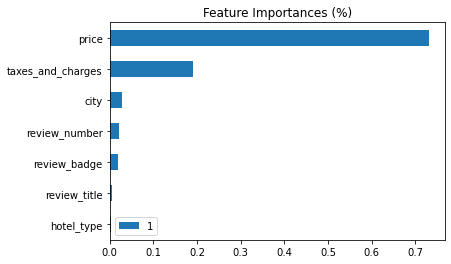

In [513]:
# Plot Feature Importances to Visualize better
pd.DataFrame(dict(zip(X_train.columns, reg_forest.feature_importances_)), index = [1])\
.T\
.sort_values(1, ascending=True)\
.plot(kind="barh", title="Feature Importances (%)");

In [514]:
X_train.columns

Index(['city', 'review_badge', 'review_title', 'review_number', 'price',
       'taxes_and_charges', 'hotel_type'],
      dtype='object')

<h1 style="color:darkblue; font-family:verdana;">XGBoost regression</h1>


In [515]:
regressor = xg.XGBRegressor(n_estimators =5000,random_state = 0) 

In [516]:
regressor.fit(X_train_scaling, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [519]:
xgboost=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

NameError: name 'nan' is not defined

In [202]:
pred = regressor.predict(X_test)

In [203]:
mse = mean_squared_error(y_test ,pred)
mae = mean_absolute_error(y_test ,pred)
rmse = mean_squared_error(y_test ,pred, squared=False)

print("MSE = ",mse)
print("MAE = ",mae)
print("RMSE = ",rmse)

MSE =  90217.01498230895
MAE =  257.2536826792343
RMSE =  300.3614738649232


In [180]:
#XGBoost regression result including binning columns

#MSE =  20750.600425676865
#MAE =  107.99101215172868
#RMSE =  144.0506870017525

#XGBoost regression result including binning columns(without scaling)

#MSE =  656.7611973158267
#MAE =  11.53004531438838
#RMSE =  25.627352522565157

#XGBoost regression without including binning columns

#MSE =  90217.01498230895
#MAE =  257.2536826792343
#RMSE =  300.3614738649232

#XGBoost regression without including binning columns(without scaling)

#MSE =  1459.2588950782742
#MAE =  20.326508453537745
#RMSE =  38.20024731697786

# Grid Search for Regression
<h1 style="color:darkblue; font-family:verdana;">Grid Search for Regression</h1>


In [398]:
# GridSearchCV
param_grid2 = {
    "n_estimators": [5,6,6],# number of trees we want to build. 
    "max_depth": [2,2,4] 
    
}

grid2 = GridSearchCV(
    reg_forest,
    param_grid2,
    cv = 5,
    n_jobs=-1,
    verbose=1,
    scoring="neg_mean_absolute_error"
)

grid2.fit(X_train_scaling, y_train)
grid_df = pd.DataFrame(grid2.cv_results_)

grid_df

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069626,0.011183,0.003819,0.001474,2,5,"{'max_depth': 2, 'n_estimators': 5}",-49.903448,-53.222069,-38.918621,-44.854167,-46.052778,-46.590216,4.839733,8
1,0.096920,0.012266,0.007821,0.007274,2,6,"{'max_depth': 2, 'n_estimators': 6}",-48.770115,-52.935632,-38.822989,-44.136574,-45.461806,-46.025423,4.712638,4
2,0.063401,0.007524,0.004415,0.002585,2,6,"{'max_depth': 2, 'n_estimators': 6}",-48.770115,-52.935632,-38.822989,-44.136574,-45.461806,-46.025423,4.712638,4
3,0.052367,0.004503,0.002811,0.000400,2,5,"{'max_depth': 2, 'n_estimators': 5}",-49.903448,-53.222069,-38.918621,-44.854167,-46.052778,-46.590216,4.839733,8
4,0.048157,0.004744,0.002206,0.000401,2,6,"{'max_depth': 2, 'n_estimators': 6}",-48.770115,-52.935632,-38.822989,-44.136574,-45.461806,-46.025423,4.712638,4
5,0.051968,0.003323,0.002813,0.000403,2,6,"{'max_depth': 2, 'n_estimators': 6}",-48.770115,-52.935632,-38.822989,-44.136574,-45.461806,-46.025423,4.712638,4
6,0.065010,0.003195,0.003211,0.000401,4,5,"{'max_depth': 4, 'n_estimators': 5}",-27.933793,-28.883448,-24.074483,-25.325000,-29.744444,-27.192234,2.150852,3
7,0.074644,0.001206,0.002409,0.000492,4,6,"{'max_depth': 4, 'n_estimators': 6}",-27.433333,-28.962644,-24.232184,-24.609954,-29.769676,-27.001558,2.239820,1
8,0.072036,0.006230,0.002408,0.000491,4,6,"{'max_depth': 4, 'n_estimators': 6}",-27.433333,-28.962644,-24.232184,-24.609954,-29.769676,-27.001558,2.239820,1


In [399]:
parameters = ['param_max_depth','param_n_estimators','mean_test_score','rank_test_score']
grid_df[parameters]


,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
0,2,5,-46.590216,8
1,2,6,-46.025423,4
2,2,6,-46.025423,4
3,2,5,-46.590216,8
4,2,6,-46.025423,4
5,2,6,-46.025423,4
6,4,5,-27.192234,3
7,4,6,-27.001558,1
8,4,6,-27.001558,1


In [400]:
grid_df[parameters].sort_values(by = ['rank_test_score'])


,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
7,4,6,-27.001558,1
8,4,6,-27.001558,1
6,4,5,-27.192234,3
1,2,6,-46.025423,4
2,2,6,-46.025423,4
4,2,6,-46.025423,4
5,2,6,-46.025423,4
0,2,5,-46.590216,8
3,2,5,-46.590216,8


In [401]:
grid2.best_score_

-27.001558109833972

In [402]:
#grid2.best_score_result including binning coulmes
#-18.47059067688378

#grid2.best_score_result including binning coulmes(without scaling)
#-18.348224776500636

#grid2.best_score_result without including binning coulmes
#-26.707951787994894

#grid2.best_score_result without including binning coulmes(without scaling)
#-26.640276181353766


In [403]:
grid2.best_params_

{'max_depth': 4, 'n_estimators': 6}

In [404]:
grid2.best_estimator_.estimators_

[DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
                       random_state=1751002438),
 DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
                       random_state=618510555),
 DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
                       random_state=237795335),
 DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
                       random_state=481769637),
 DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
                       random_state=1239247864),
 DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
                       random_state=880598456)]

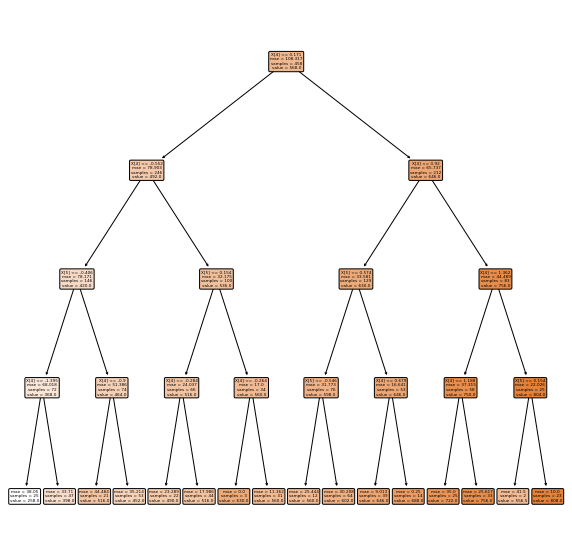

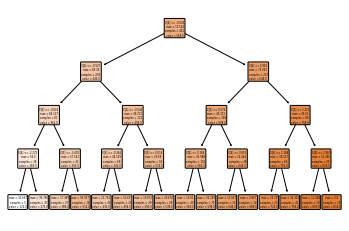

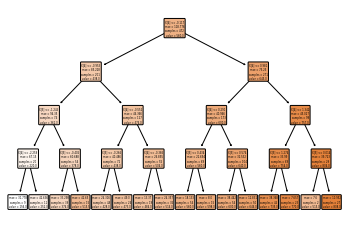

In [ ]:
plt.figure(figsize = (10,10))
for x in range(len(grid2.best_estimator_.estimators_)):
    tree.plot_tree(
    grid2.best_estimator_.estimators_[x], 
    filled=True,
    rounded=True,
    )
    plt.show()

In [ ]:

reg_forest_2 = RandomForestRegressor(max_depth=4, n_estimators = 6)


In [ ]:
reg_forest_2.fit(X_train_scaling, y_train)
preds_reg_2 = reg_forest_2.predict(X_test_scaling)

In [ ]:
preds_reg_2

In [ ]:
#Applying the cost functions. 
mse = mean_squared_error(y_true=y_test ,y_pred=preds_reg_2)
mae = mean_absolute_error(y_true=y_test ,y_pred=preds_reg_2)
rmse = mean_squared_error(y_true=y_test ,y_pred=preds_reg_2, squared=False)

print("MSE = ",mse)
print("MAE = ",mae)
print("RMSE = ",rmse)

In [ ]:
#reg_forest_2 = RandomForestRegressor(max_depth=4, n_estimators = 6)

#MSE =  2450.2997470609016
#MAE =  29.171411039506637
#RMSE =  49.50050249301417


#reg_forest_2 = RandomForestRegressor(criterion='mae', max_depth=4, max_features='auto',random_state=1751002438)

#MSE =  2556.8955498618784
#MAE =  27.87848066298342
#RMSE =  50.565754714647326


#reg_forest_2 = RandomForestRegressor(criterion='mae', max_depth=4, max_features='auto',random_state=618510555)

#MSE =  2442.163687292817
#MAE =  26.96745856353591
#RMSE =  49.41825257223101


#reg_forest_2 = RandomForestRegressor(criterion='mae', max_depth=4, max_features='auto',random_state=237795335)

#MSE =  2500.8187491712706
#MAE =  27.15425414364641
#RMSE =  50.00818682147225


#reg_forest_2 = RandomForestRegressor(criterion='mae', max_depth=4, max_features='auto',random_state=481769637)

#MSE =  2396.0152249999996
#MAE =  26.991187845303863
#RMSE =  48.94910852099351


#reg_forest_2 = RandomForestRegressor(criterion='mae', max_depth=4, max_features='auto', random_state=1239247864)

#MSE =  2424.8980613259673
#MAE =  26.817790055248622
#RMSE =  49.24325396768543


#reg_forest_2 = RandomForestRegressor(criterion='mae', max_depth=4, max_features='auto',random_state=880598456)

#MSE =  2435.0906538674035
#MAE =  26.94331491712708
#RMSE =  49.34663771593161
